Text(0.5, 1.0, 'Sensor1 vs Sensor5')

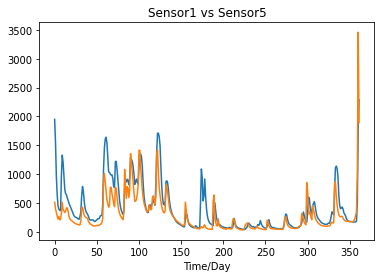

In [79]:
import pandas as pd 
import numpy as np 
import  matplotlib.pyplot  as plt
data = pd.read_csv(r'C:\Users\89457\Desktop\optimizaiton\Spatial-Temporal\spatial-temporal\grin-main\datasets/discharge\SSC_discharge.csv',index_col=0)
data_array = data.values
plt.plot(data_array[262:624,0],label = 'sensor1')
plt.plot(data_array[262:624,4]*2, label = 'sensor5')
plt.xlabel('Time/Day')
plt.title('Sensor1 vs Sensor5')

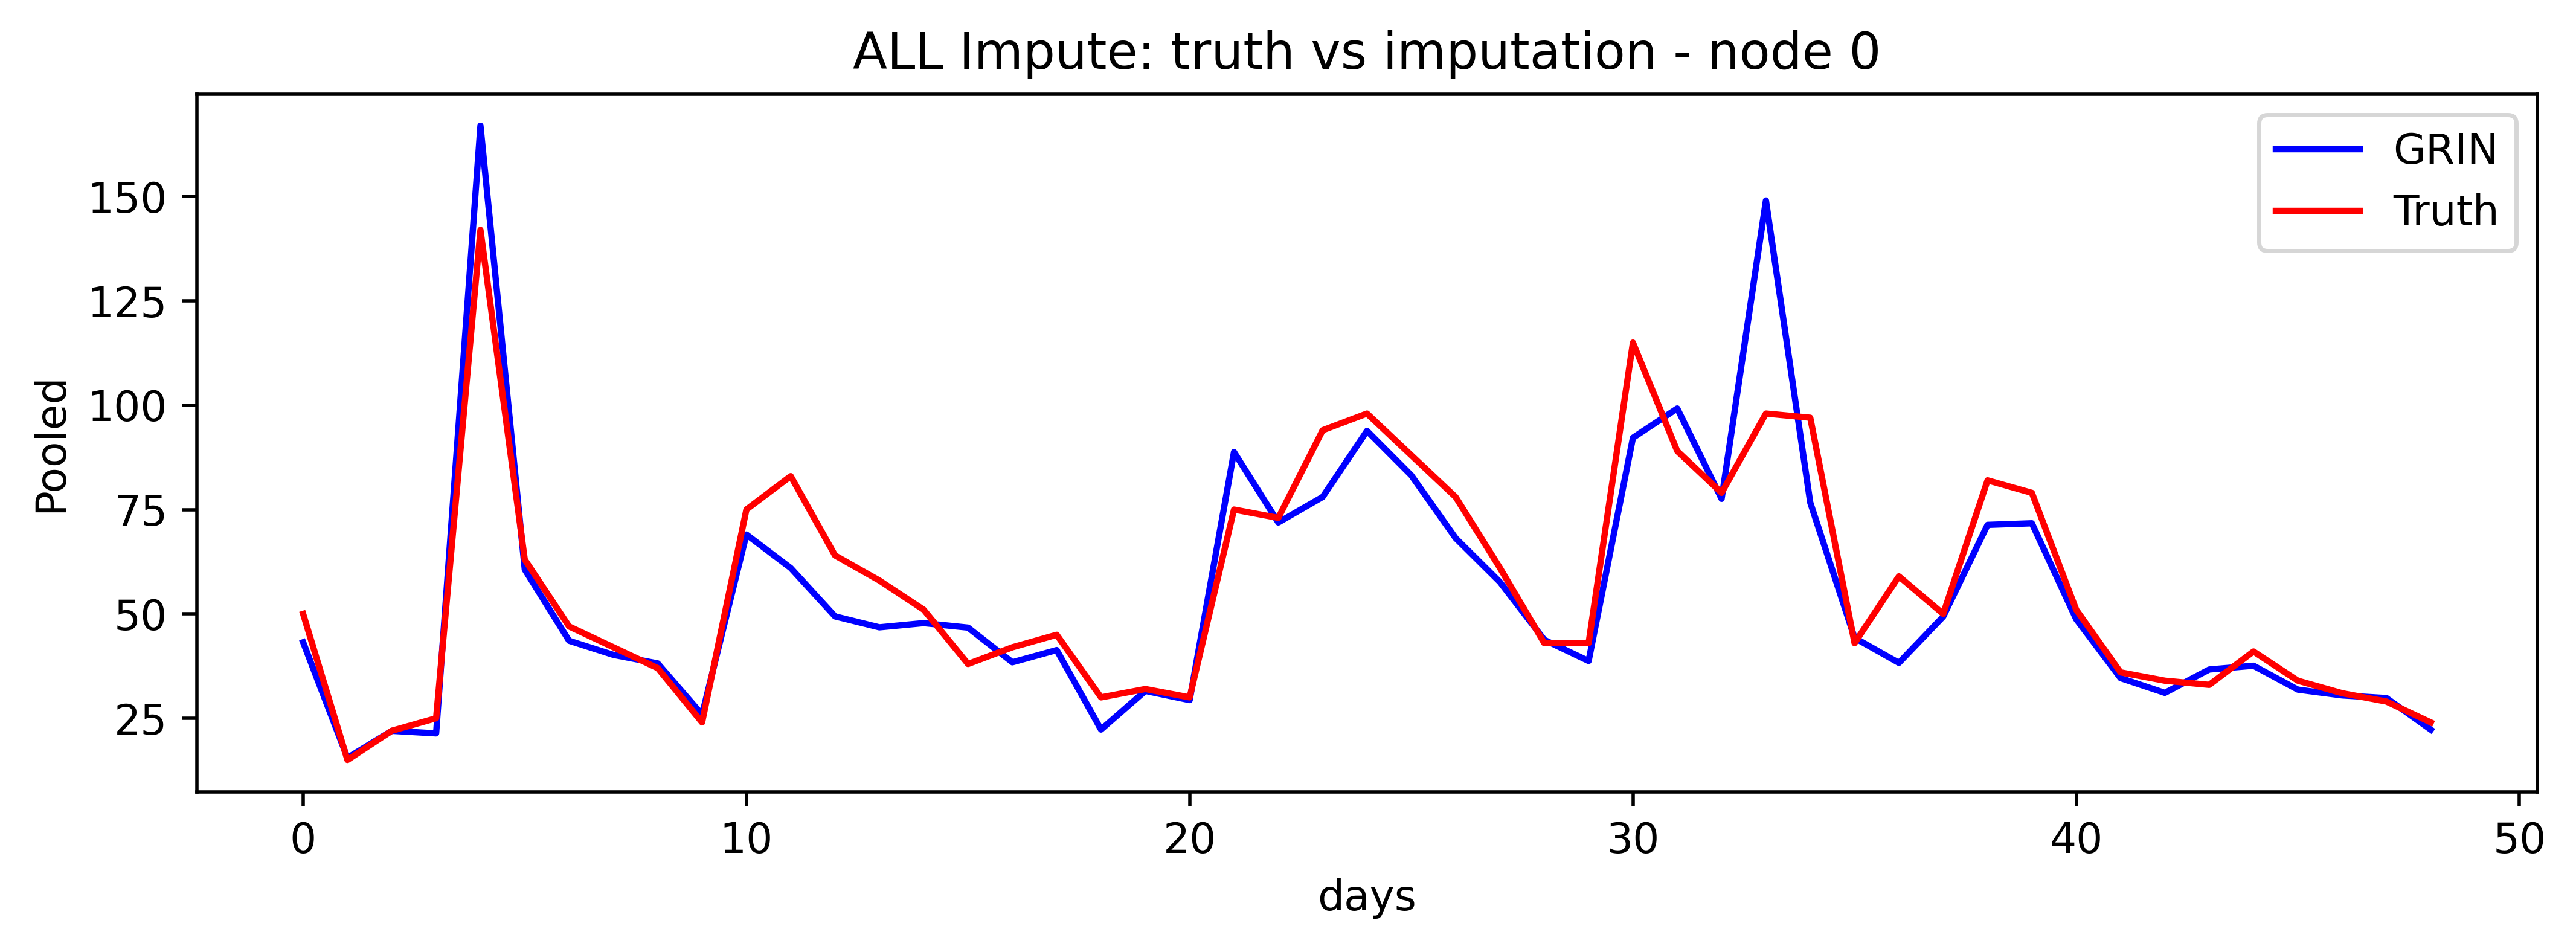

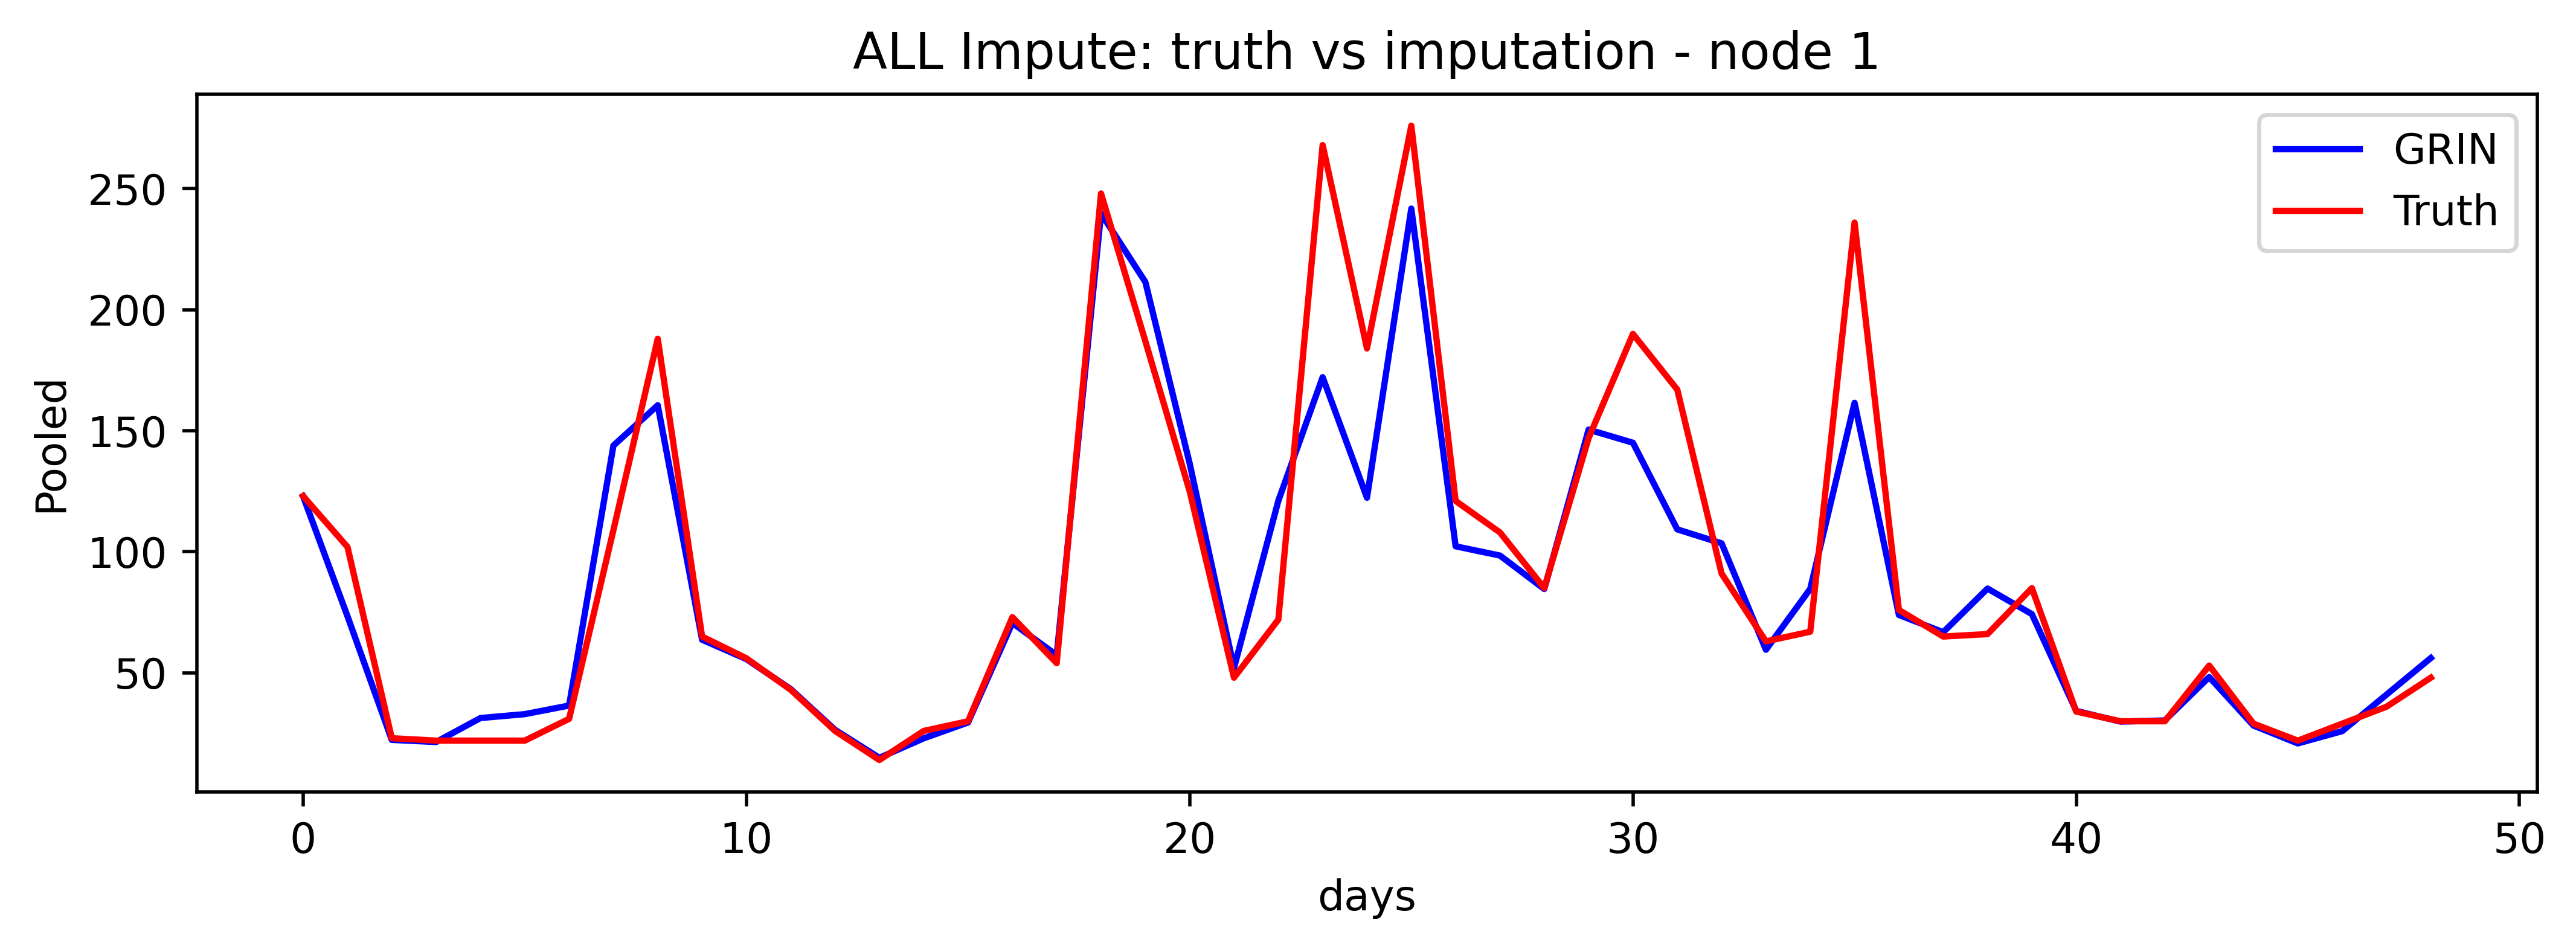

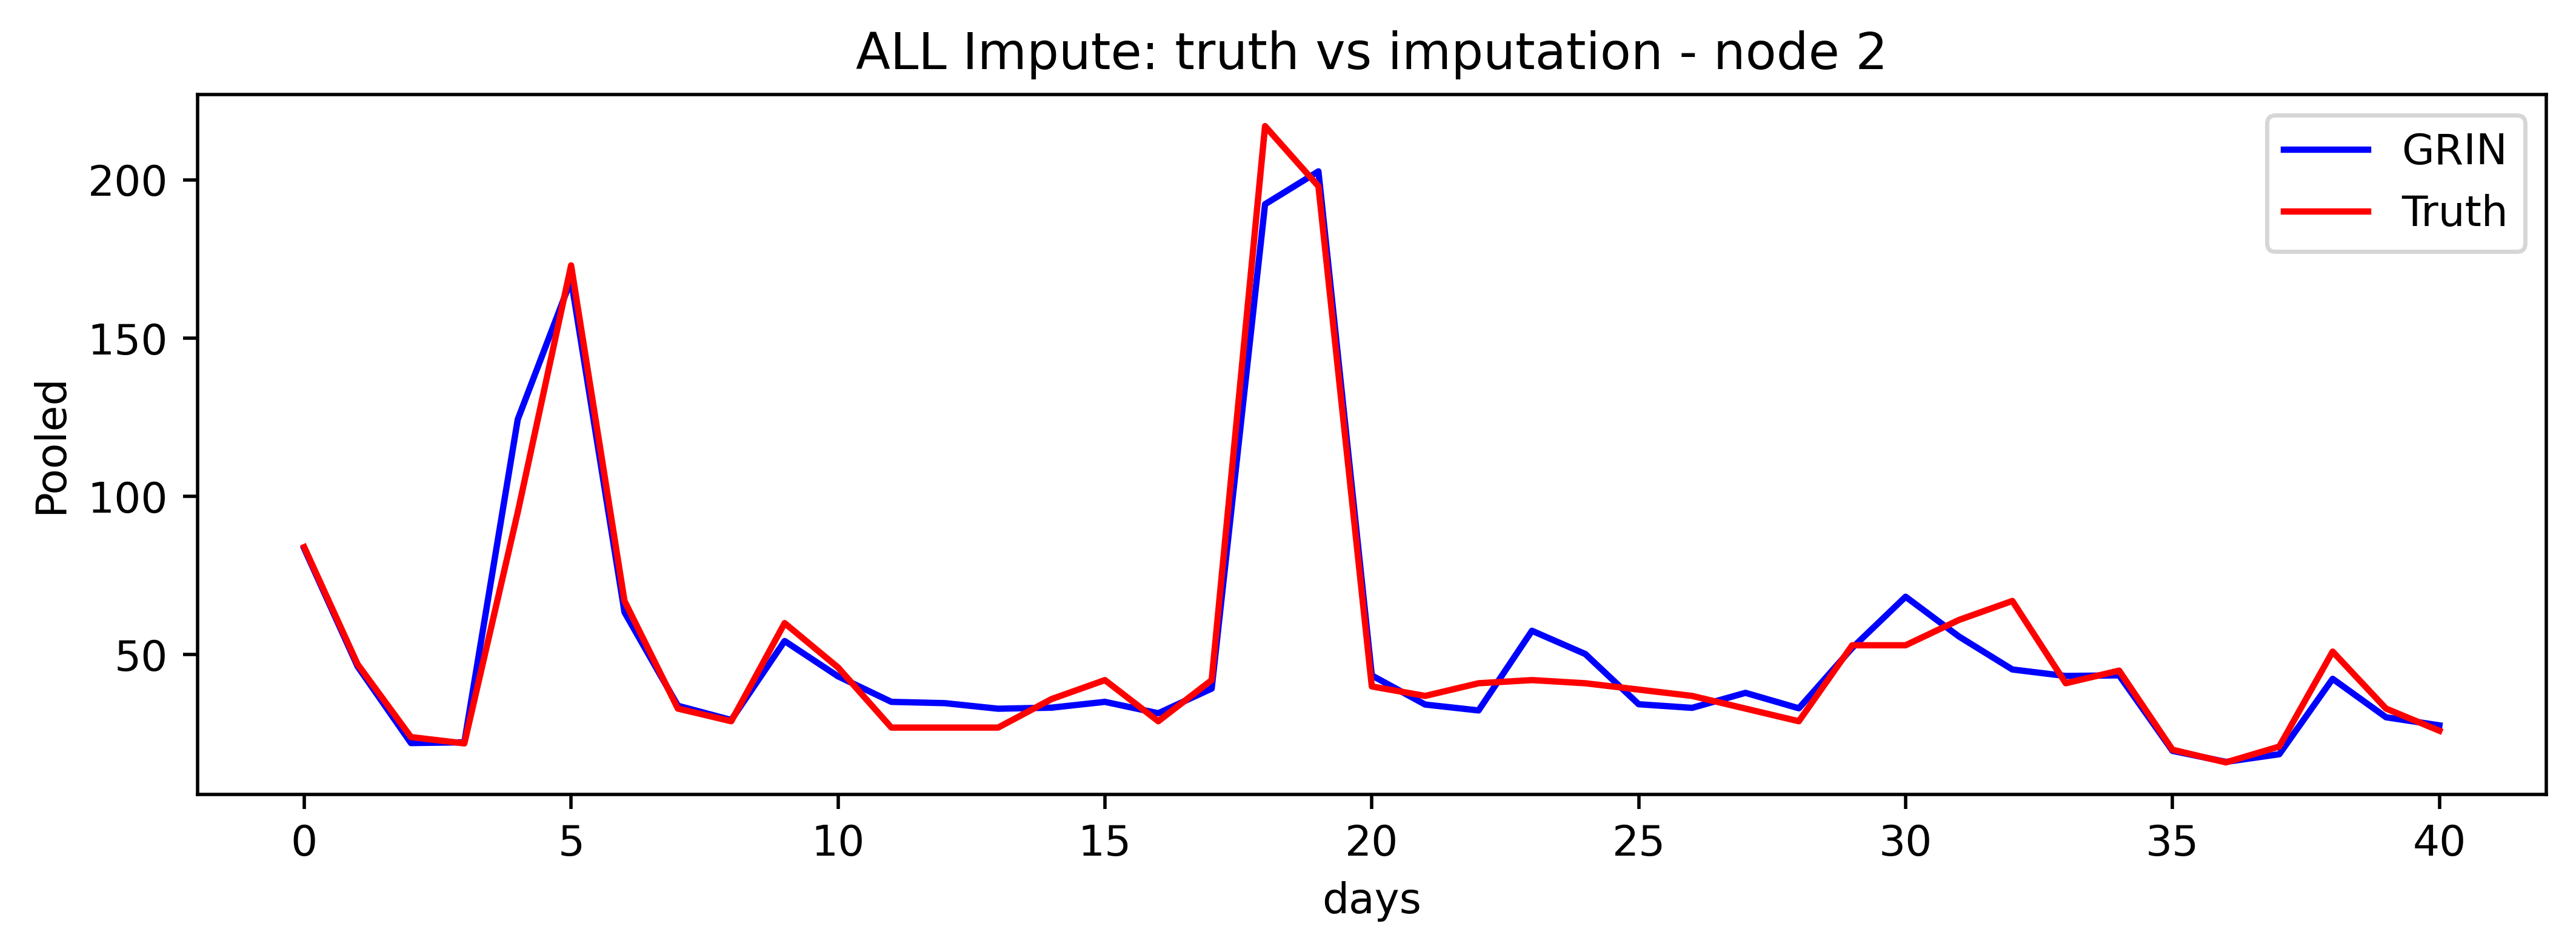

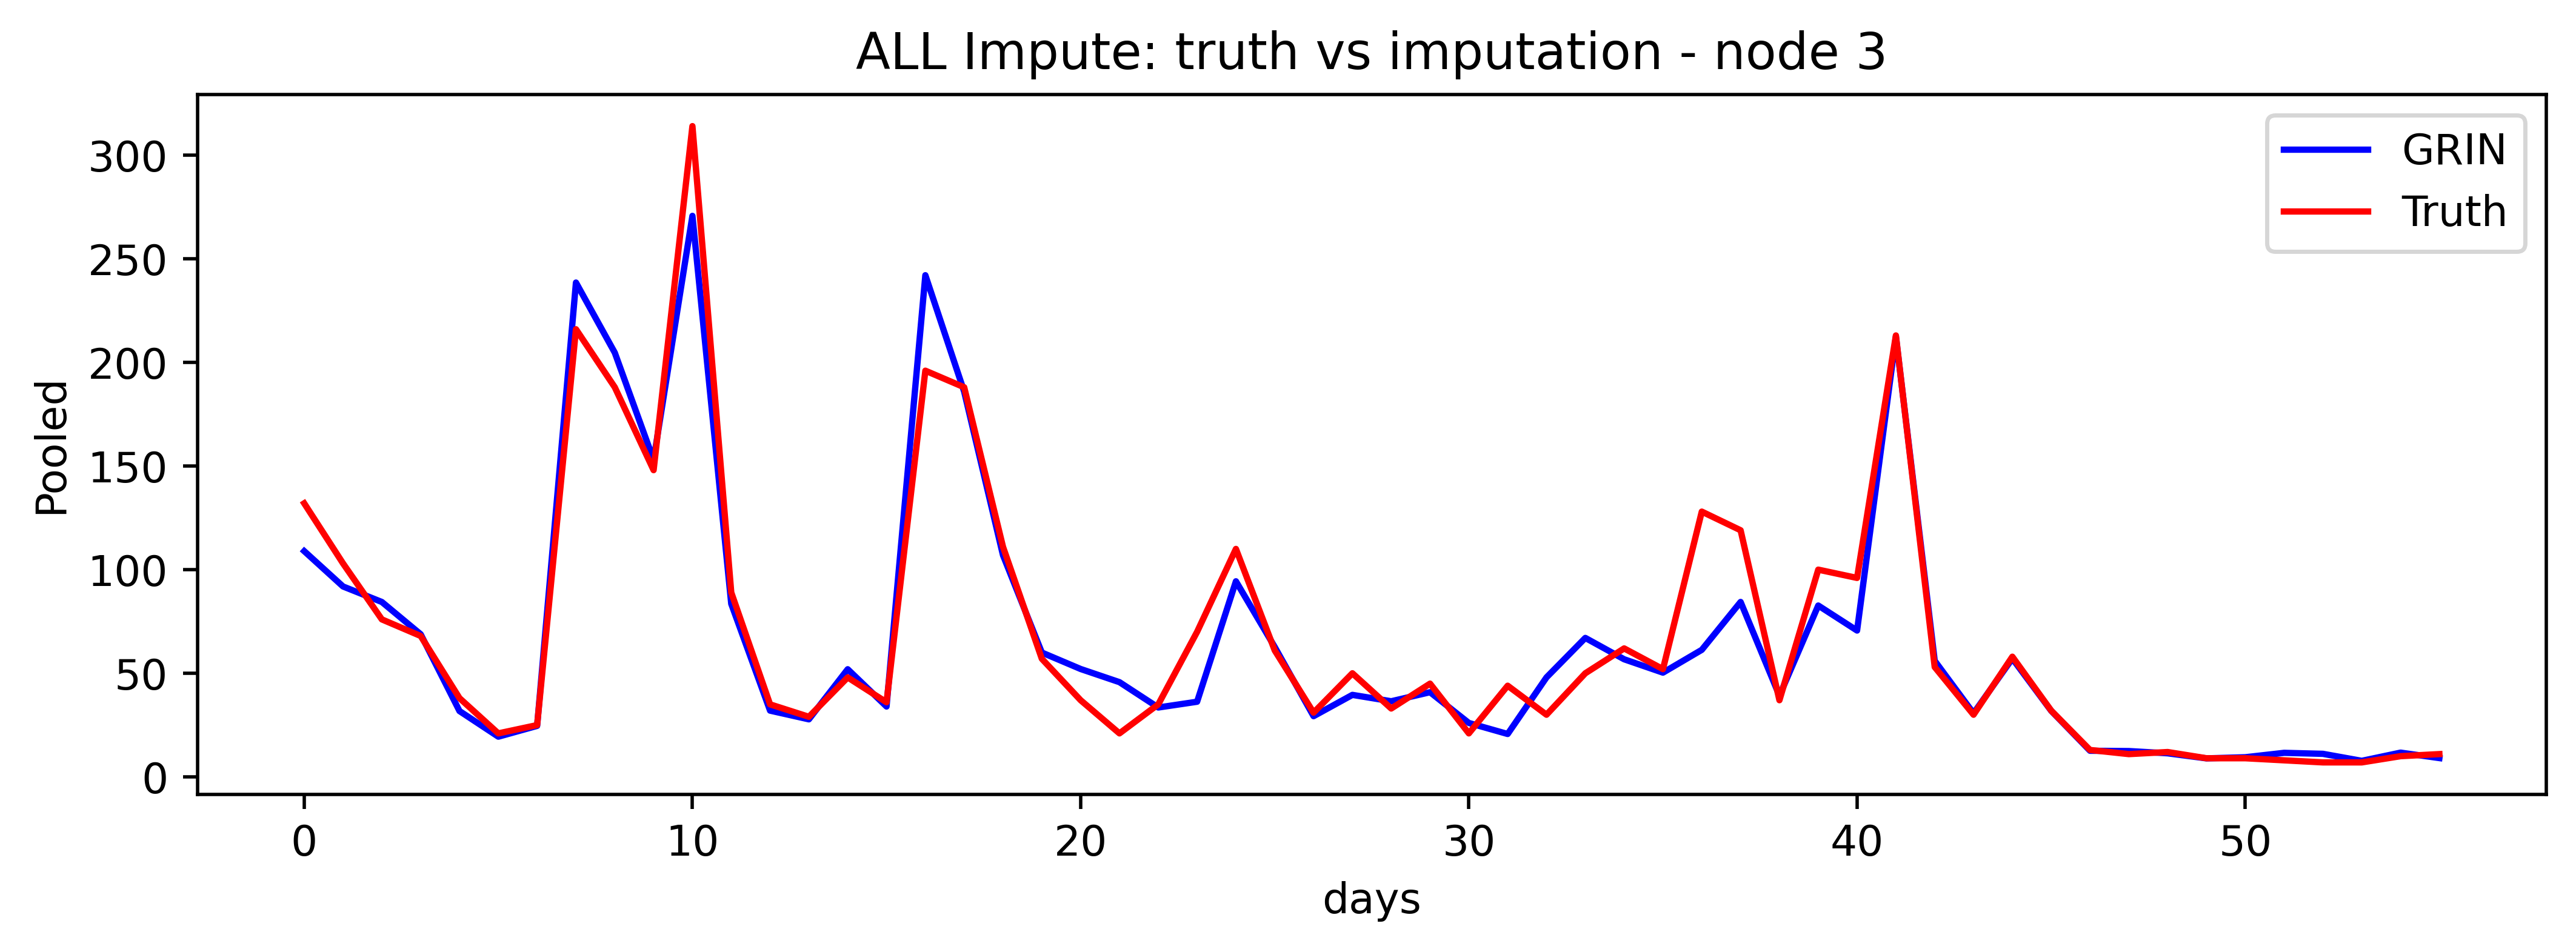

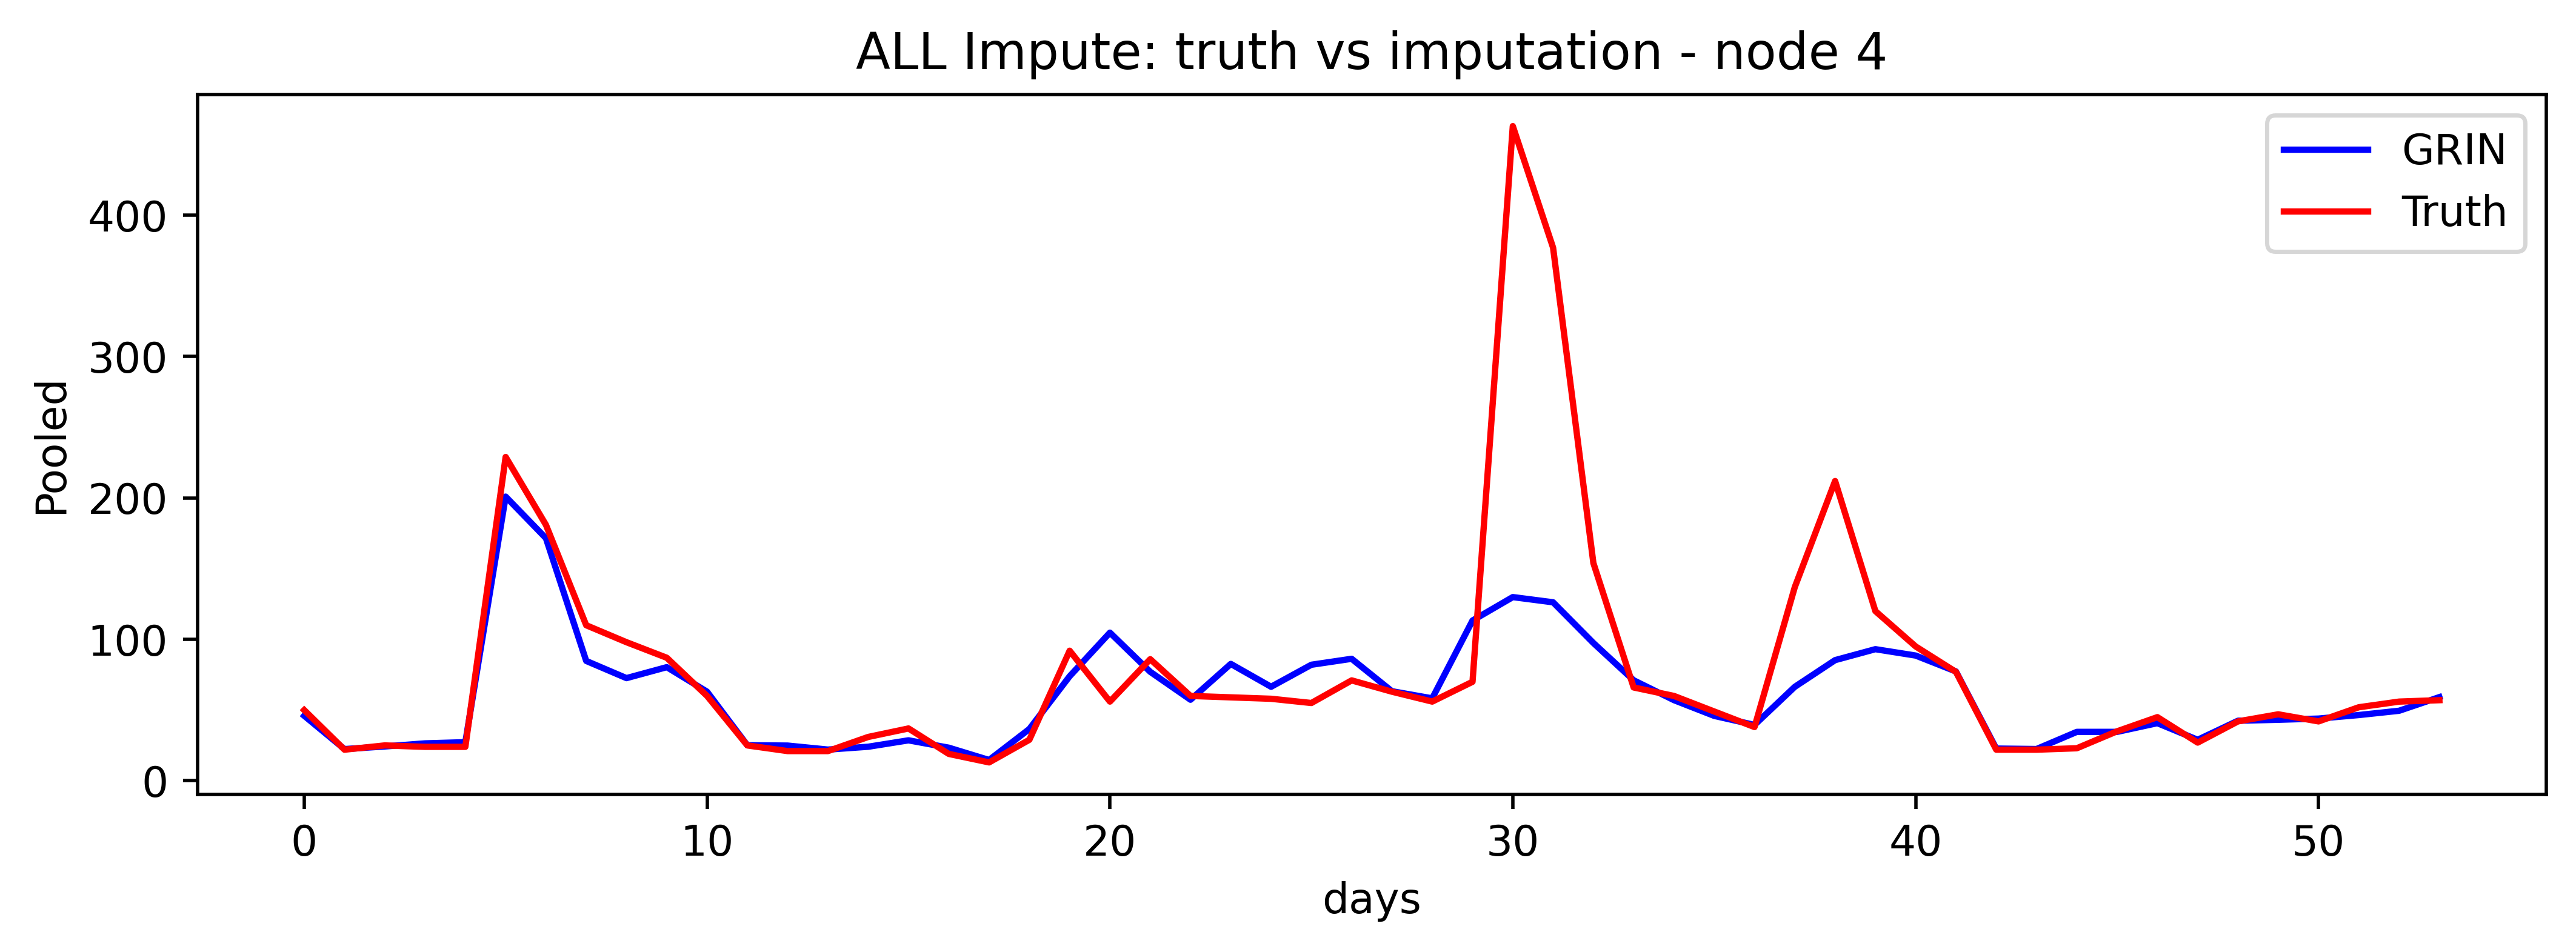

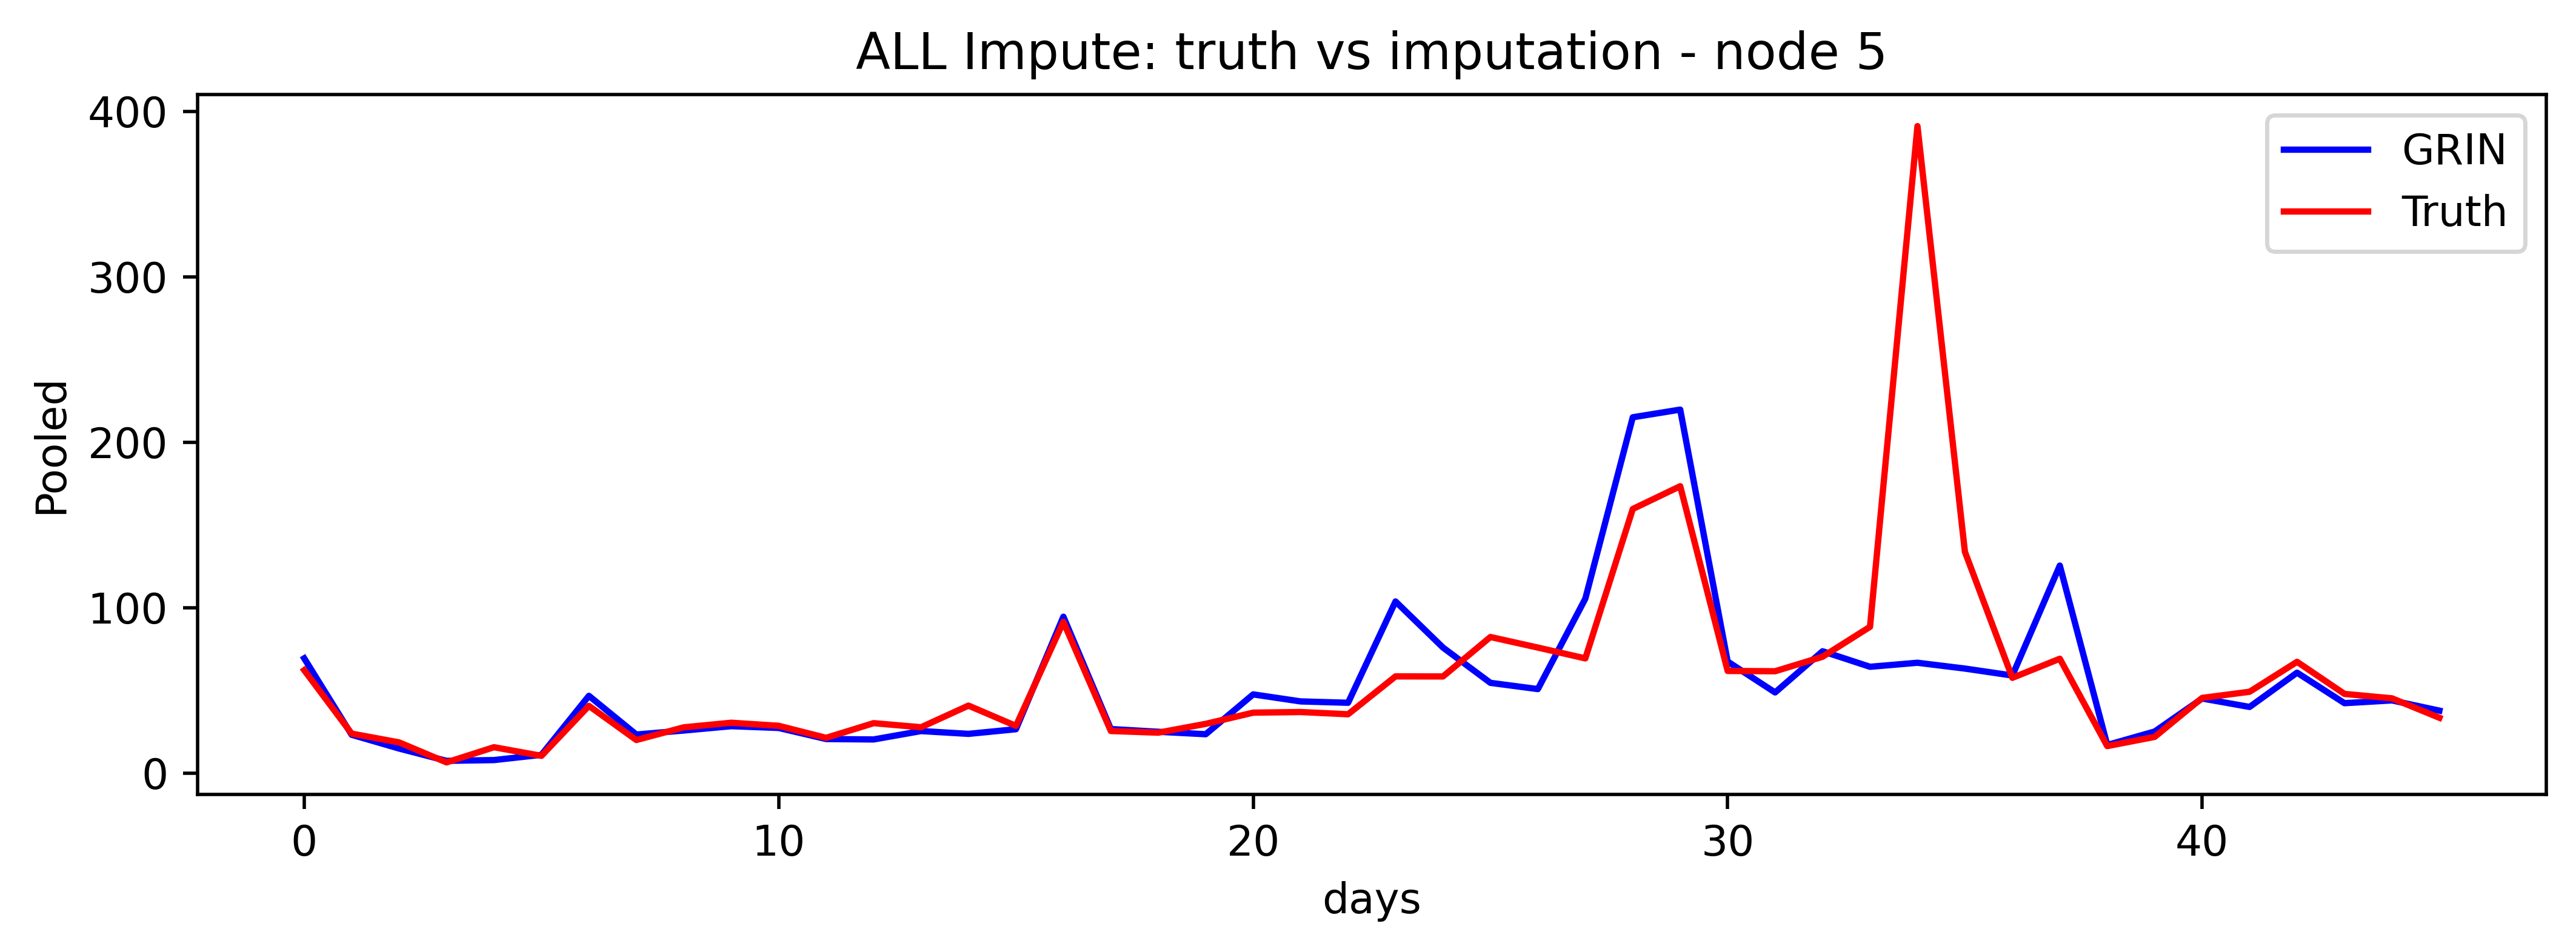

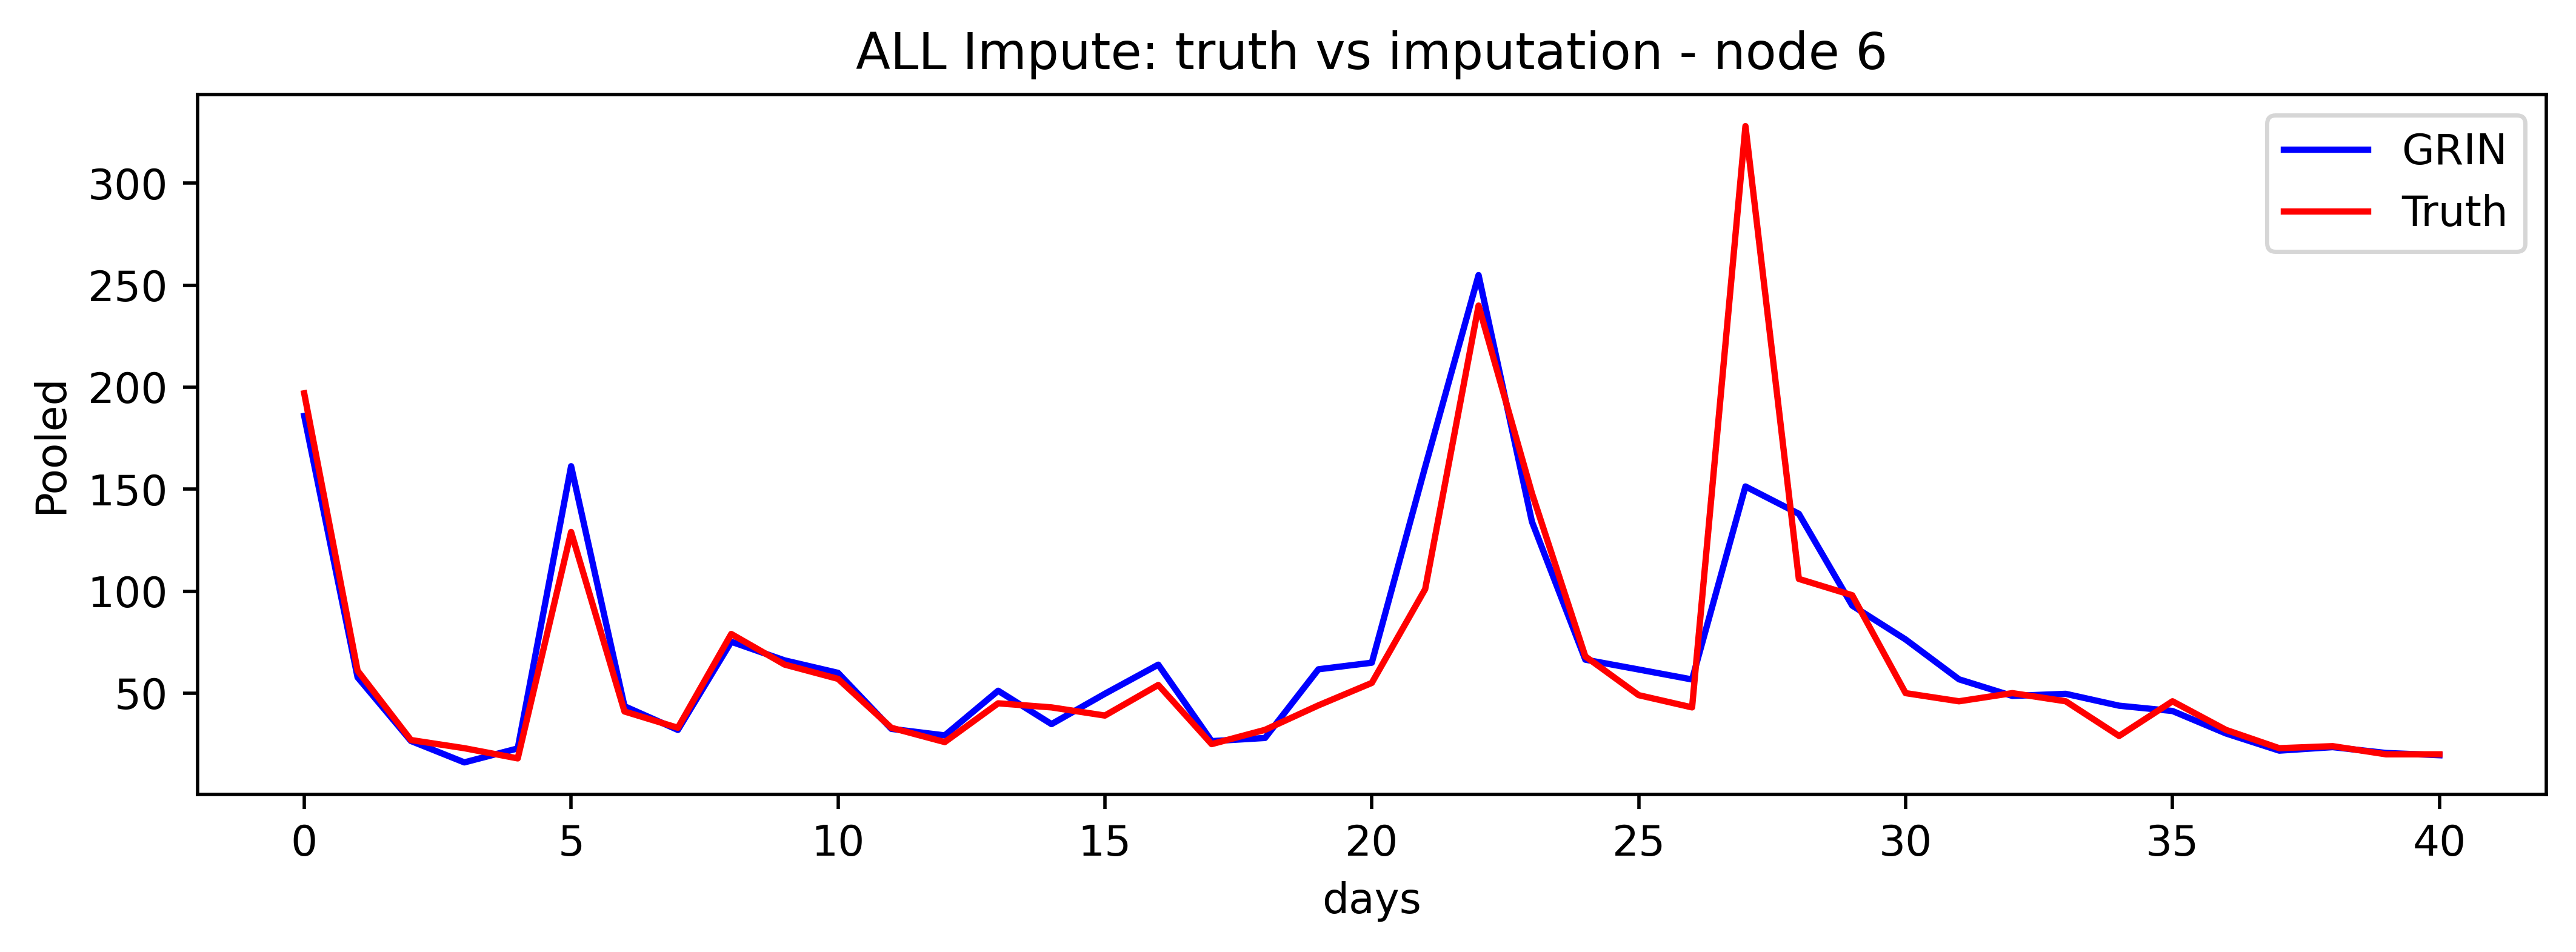

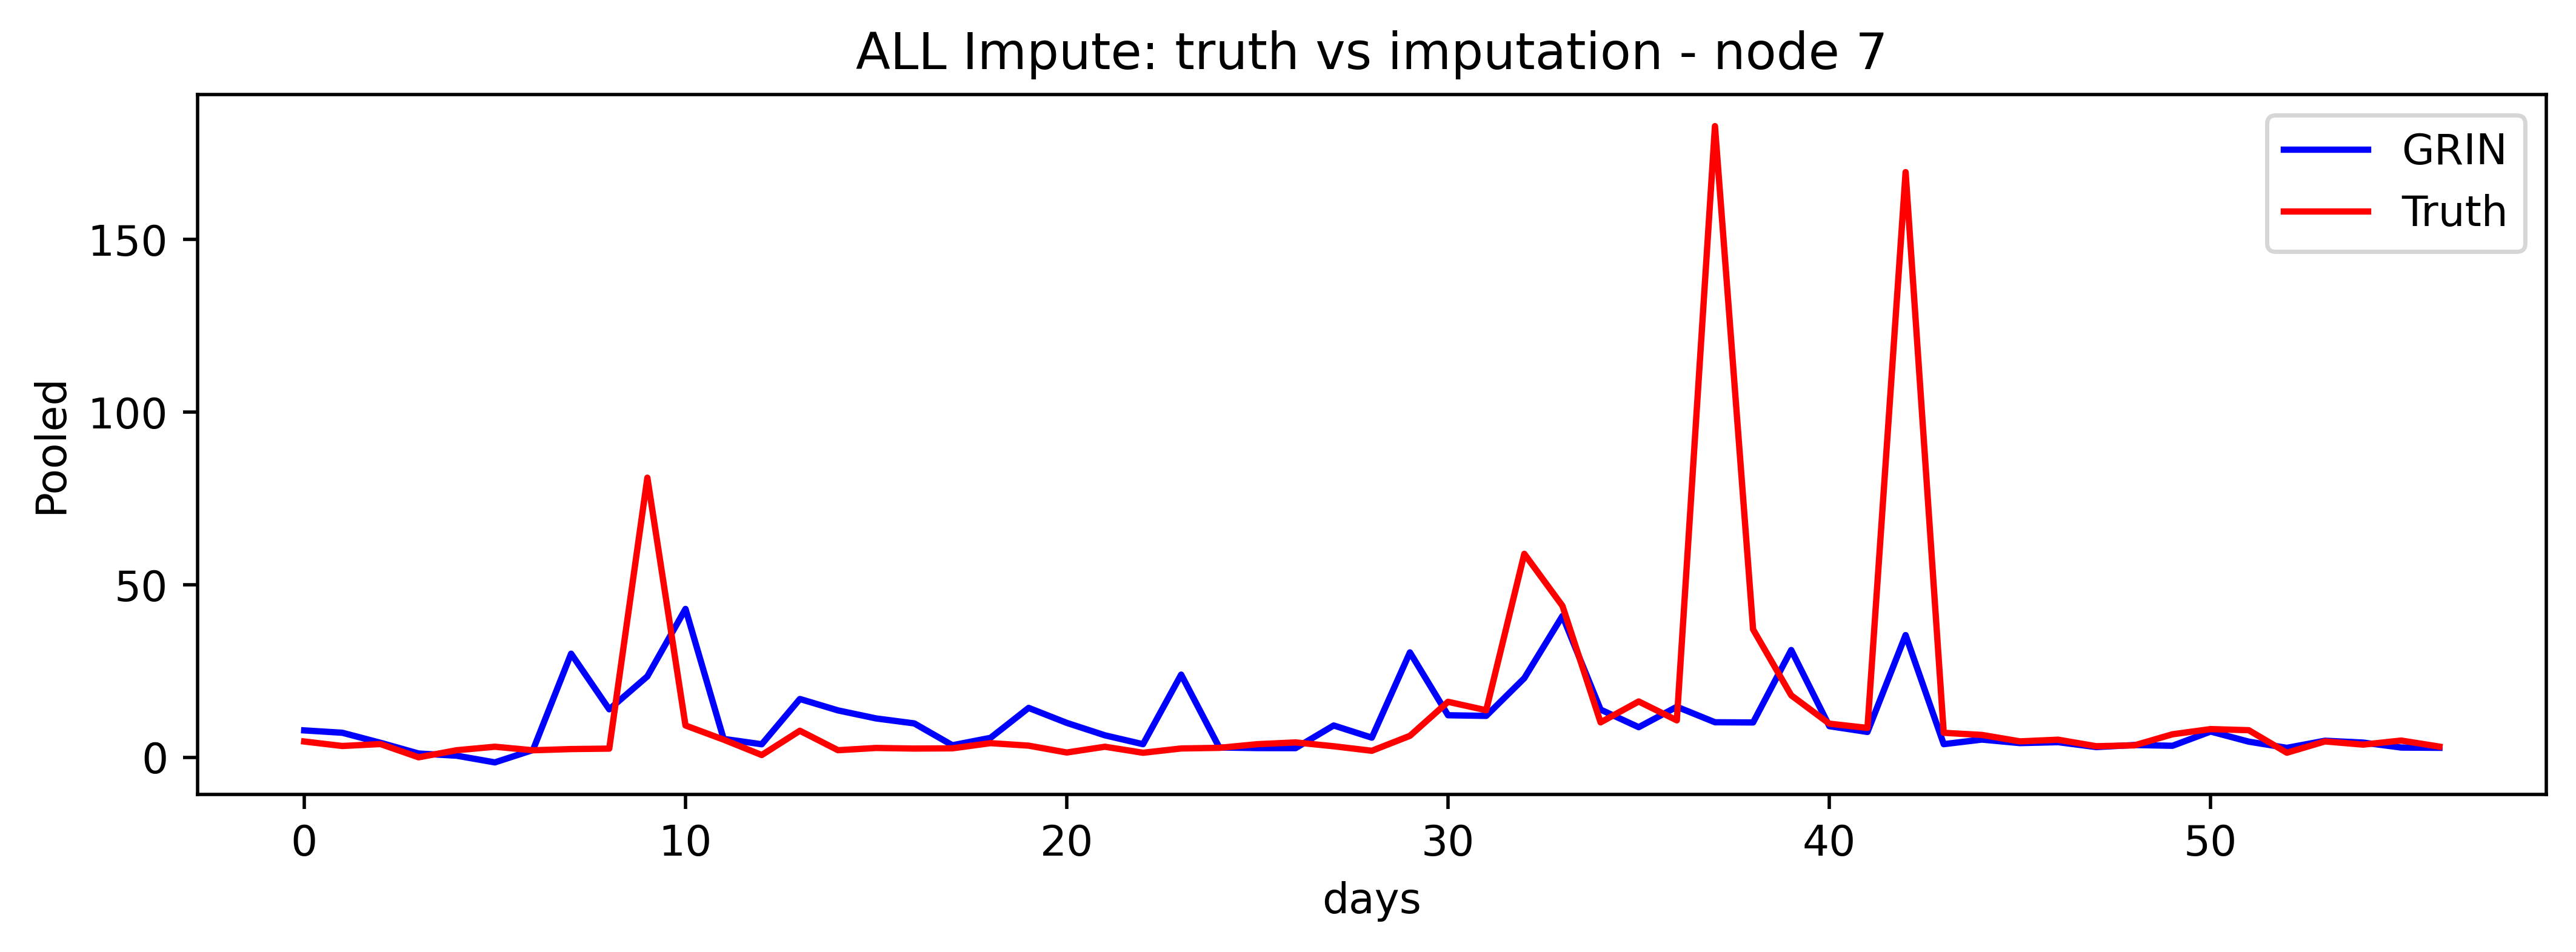

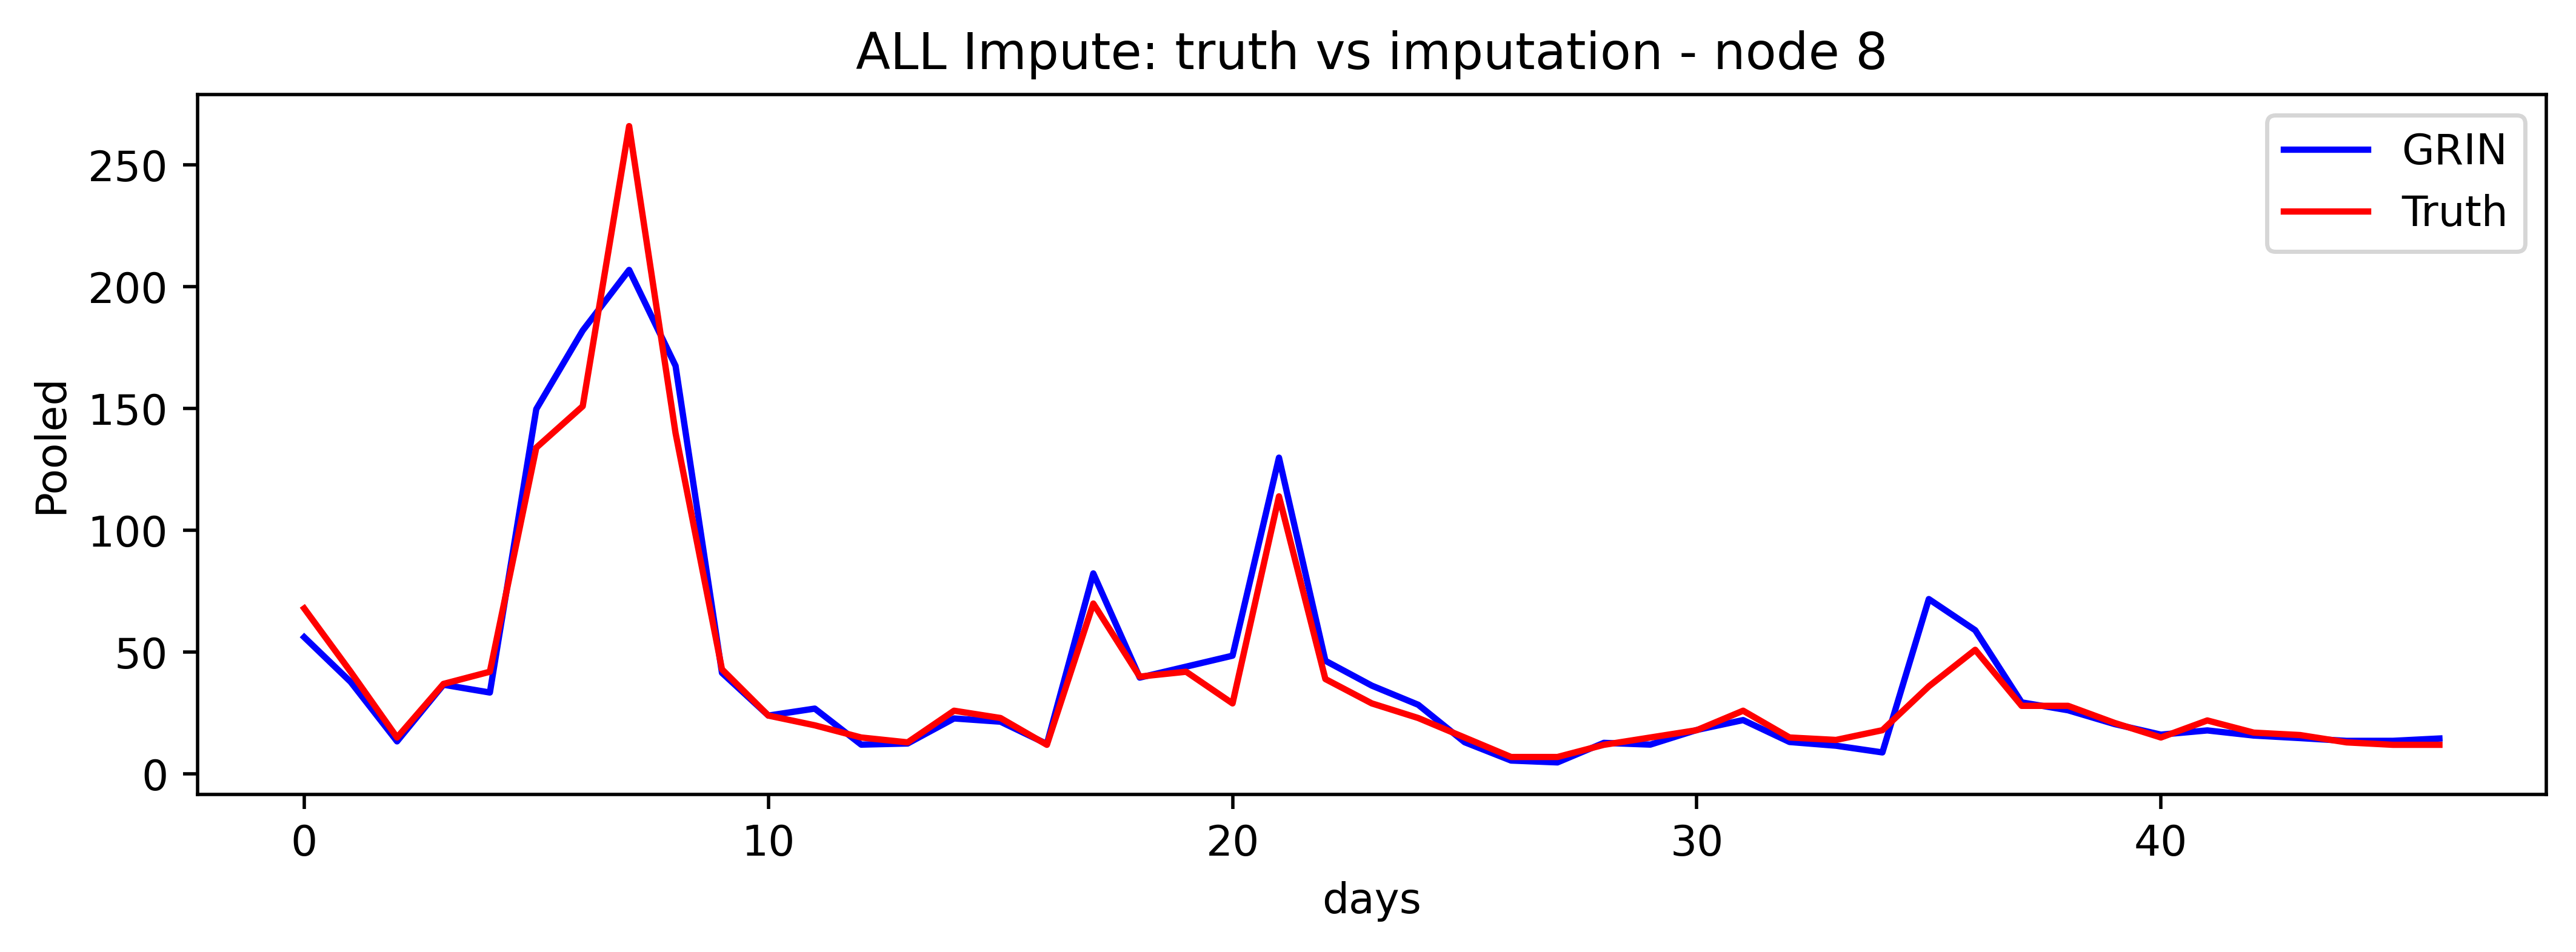

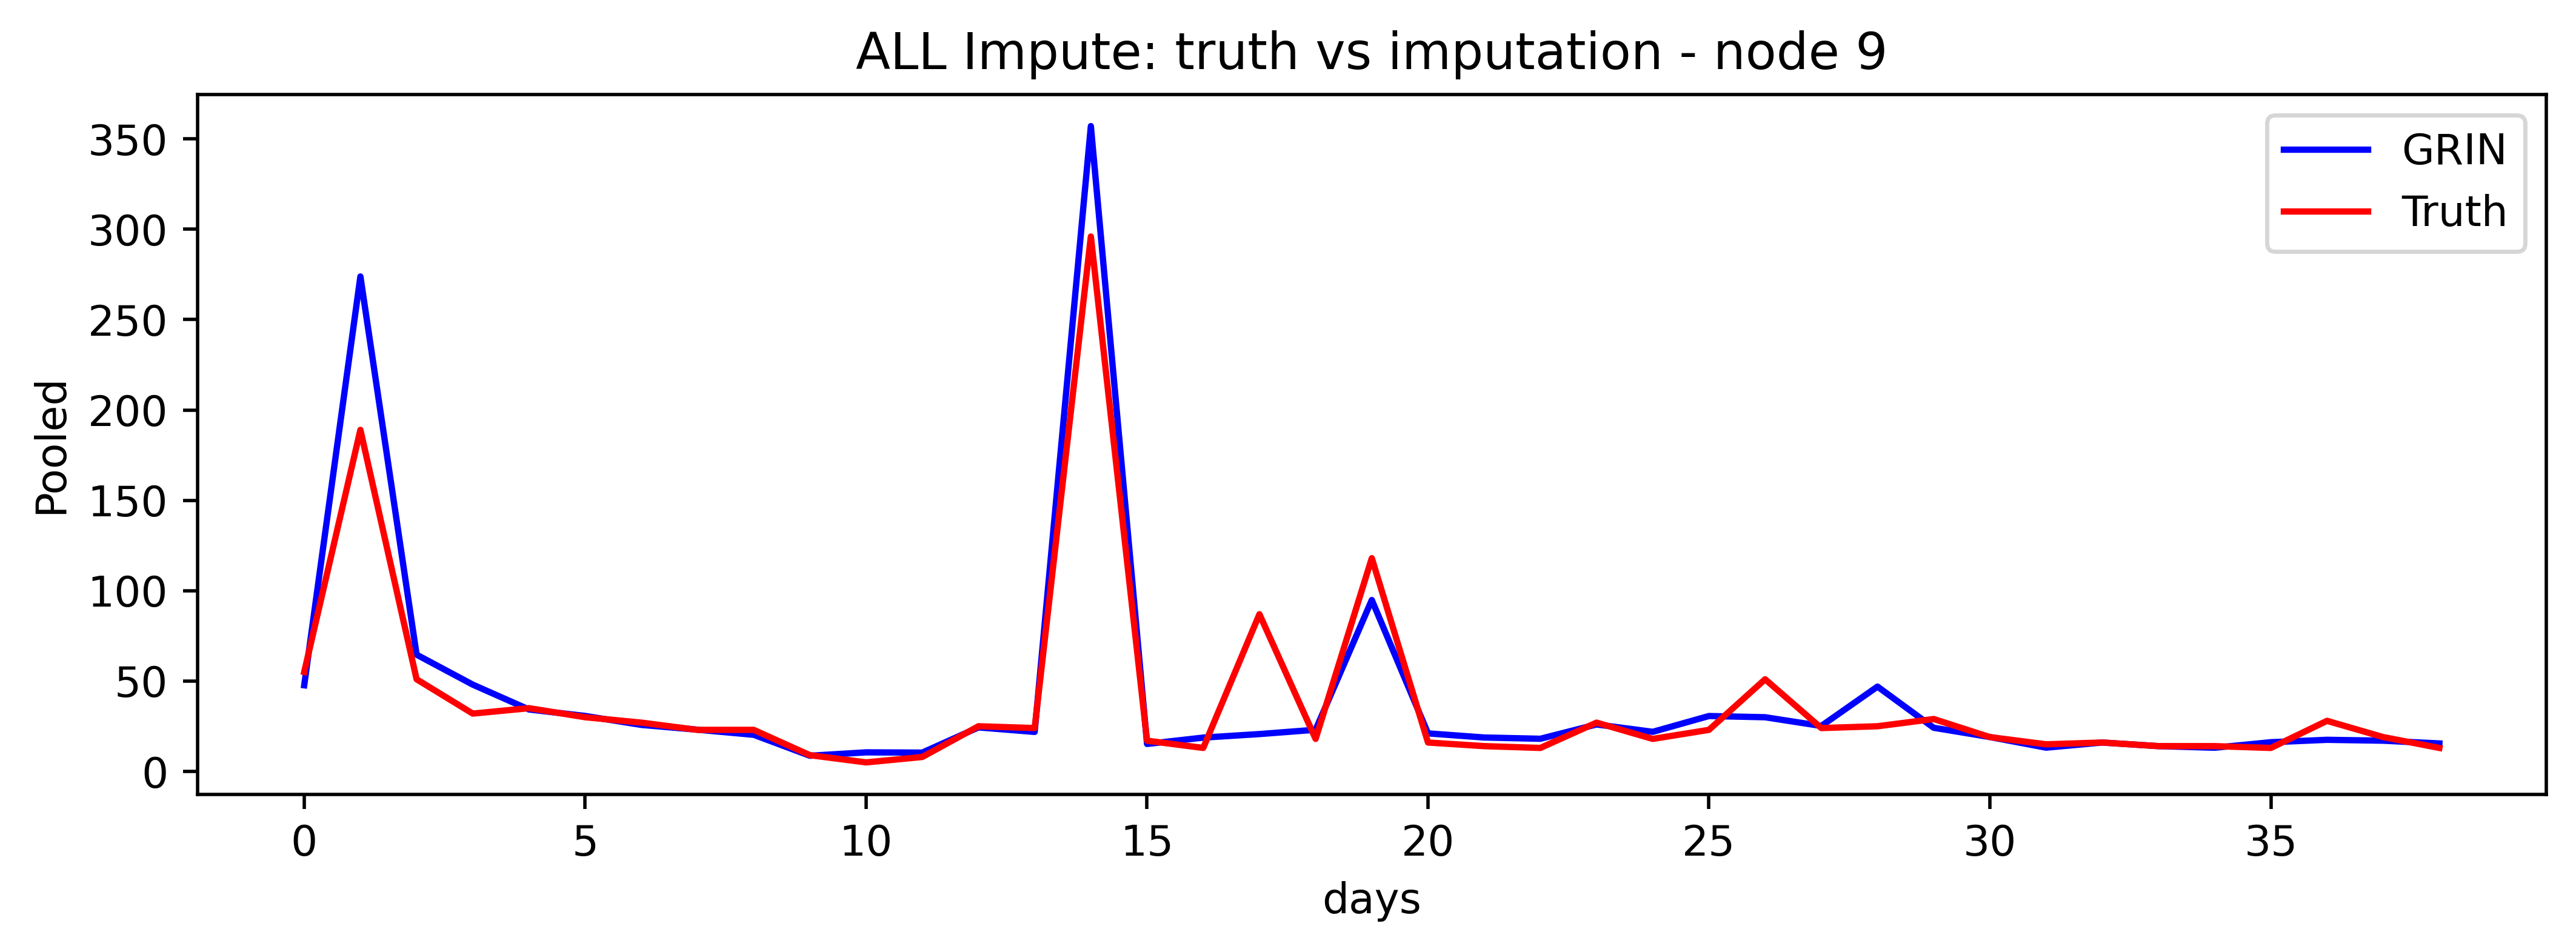

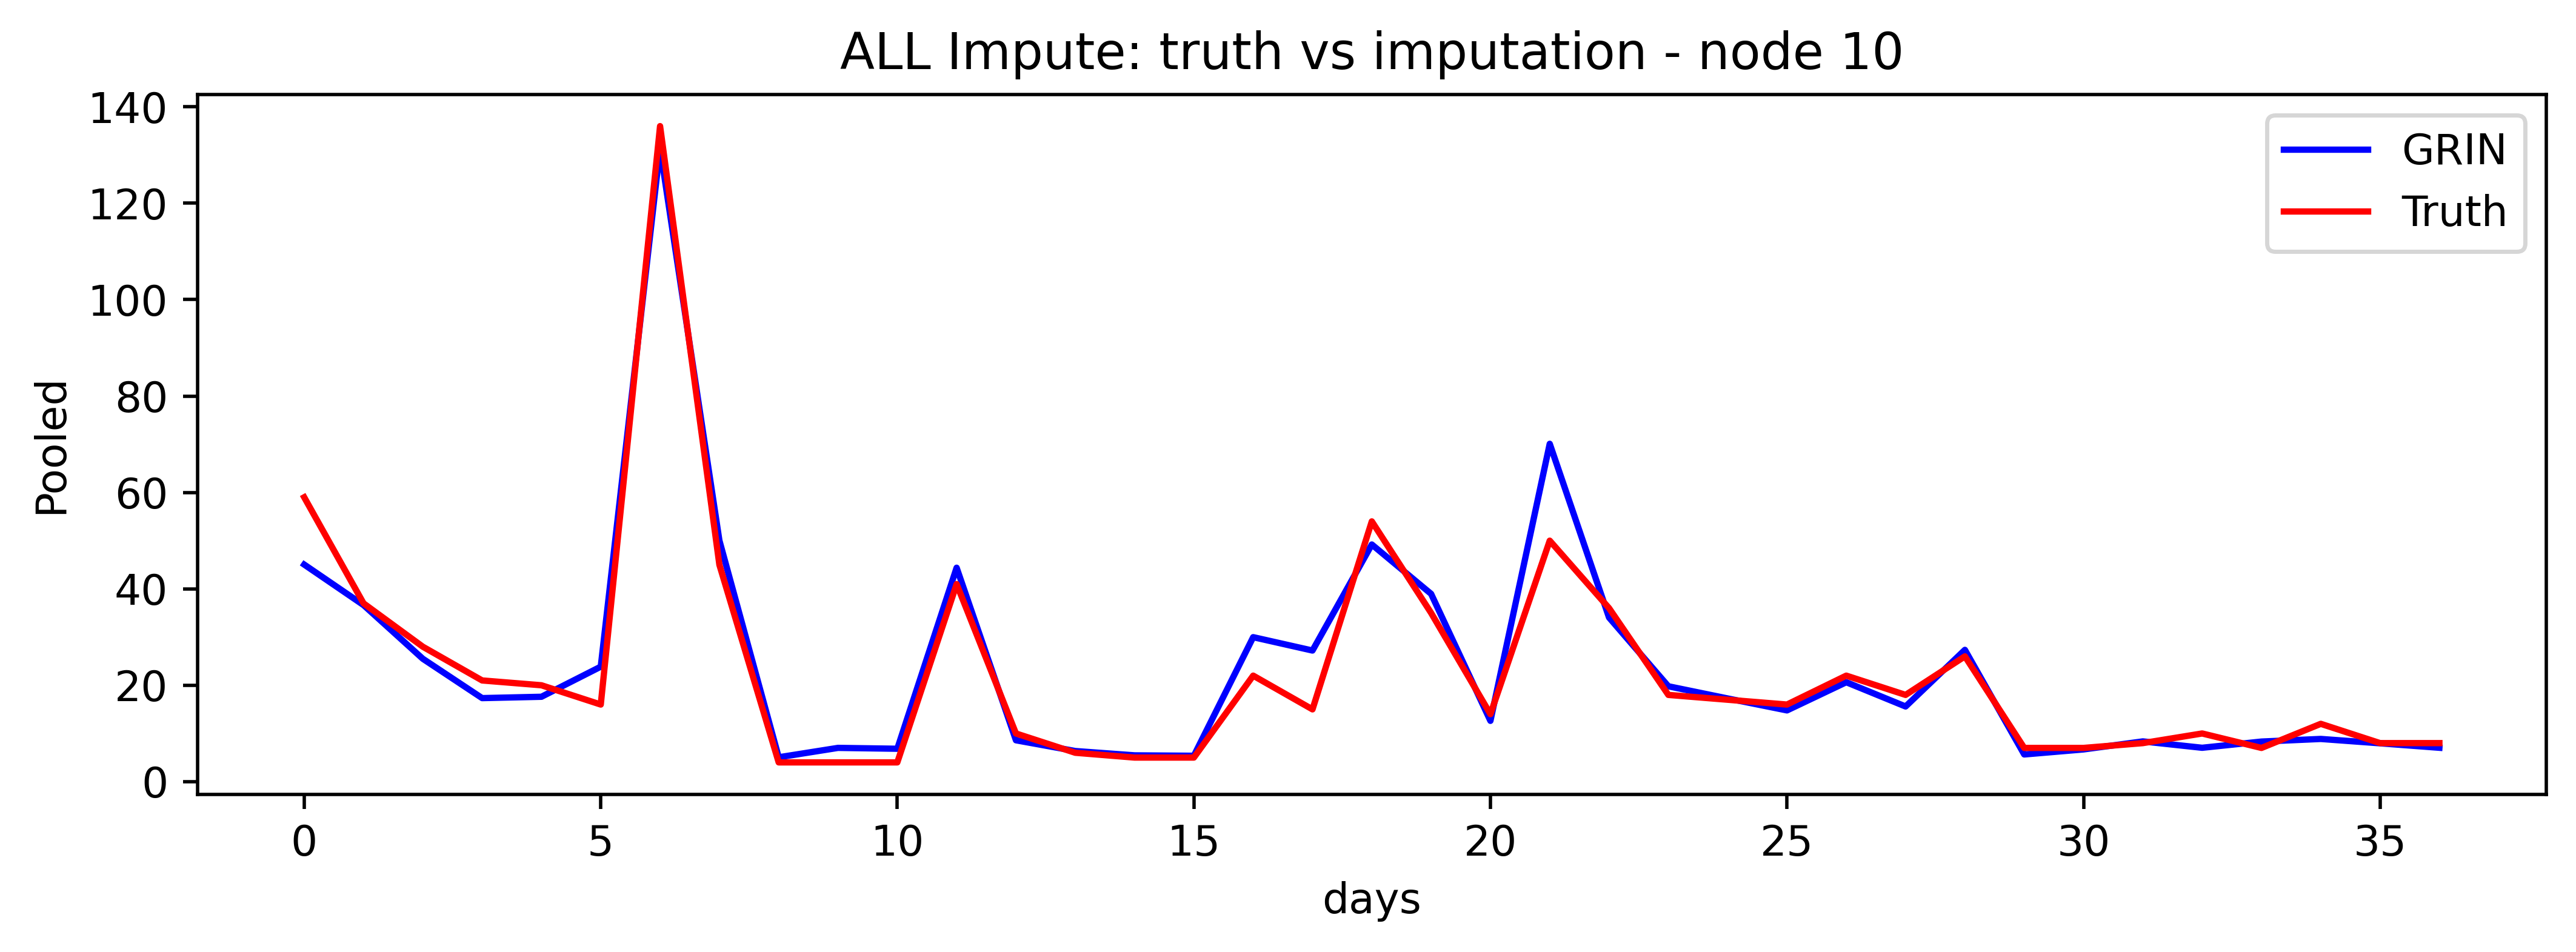

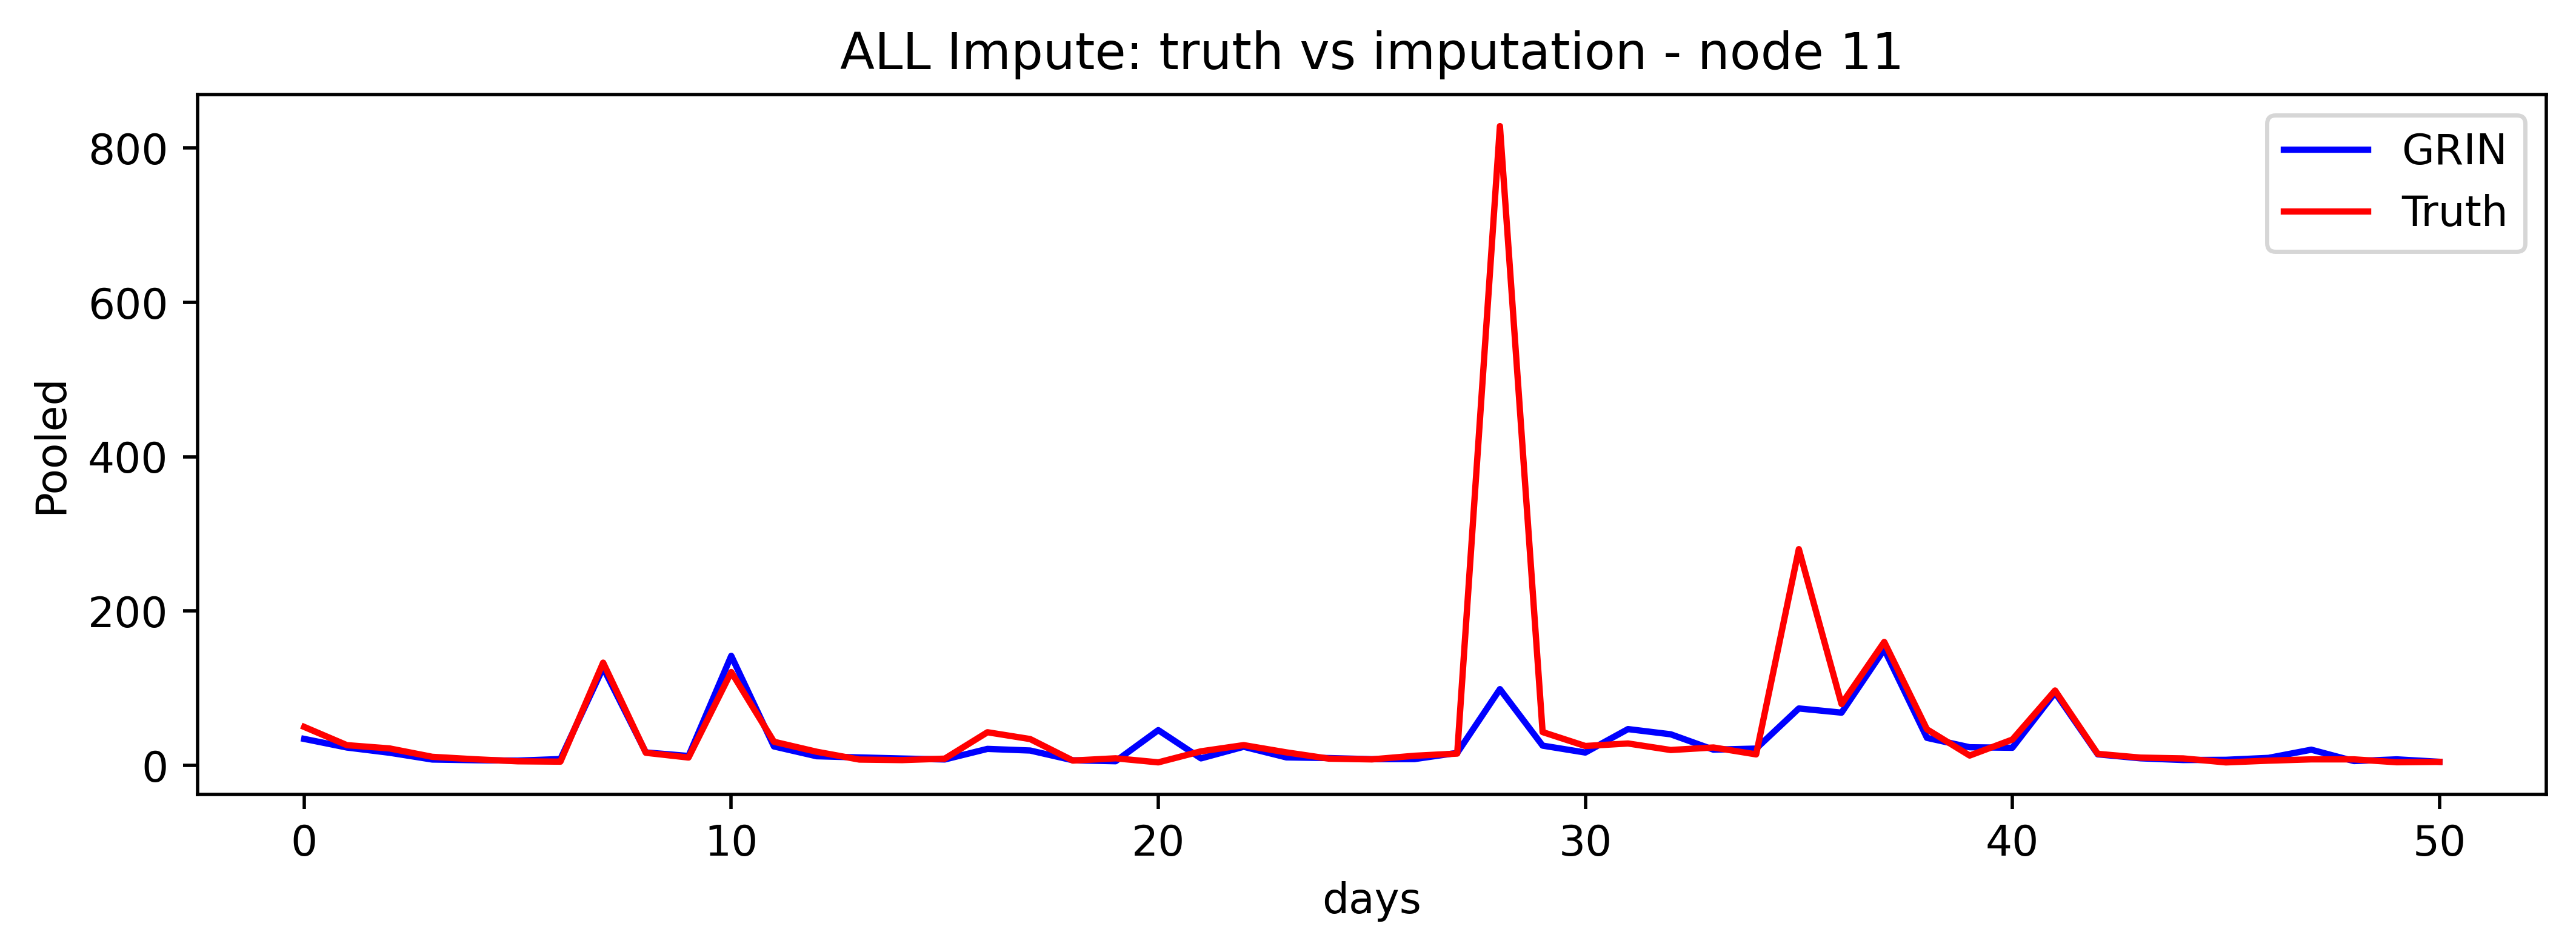

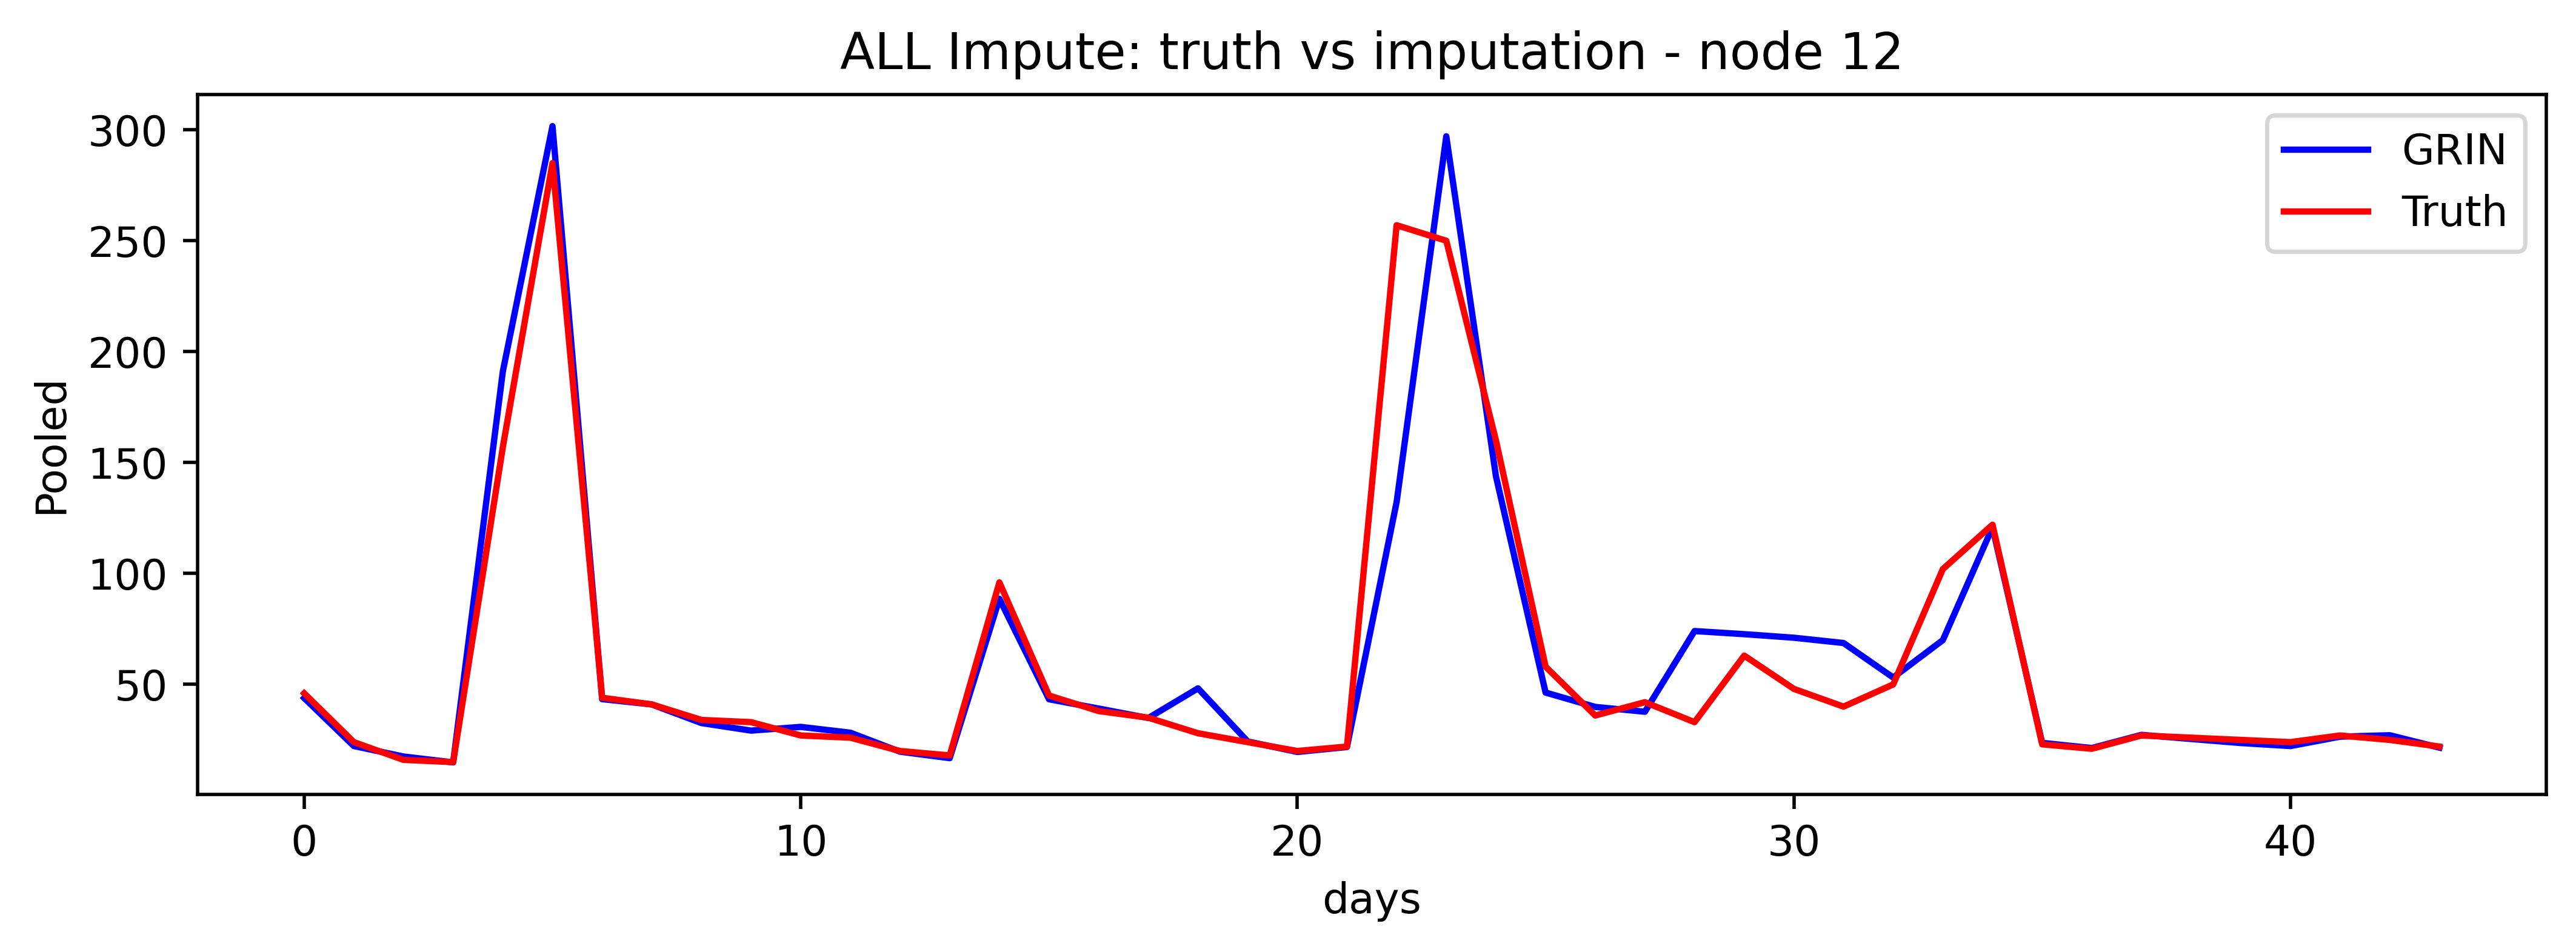

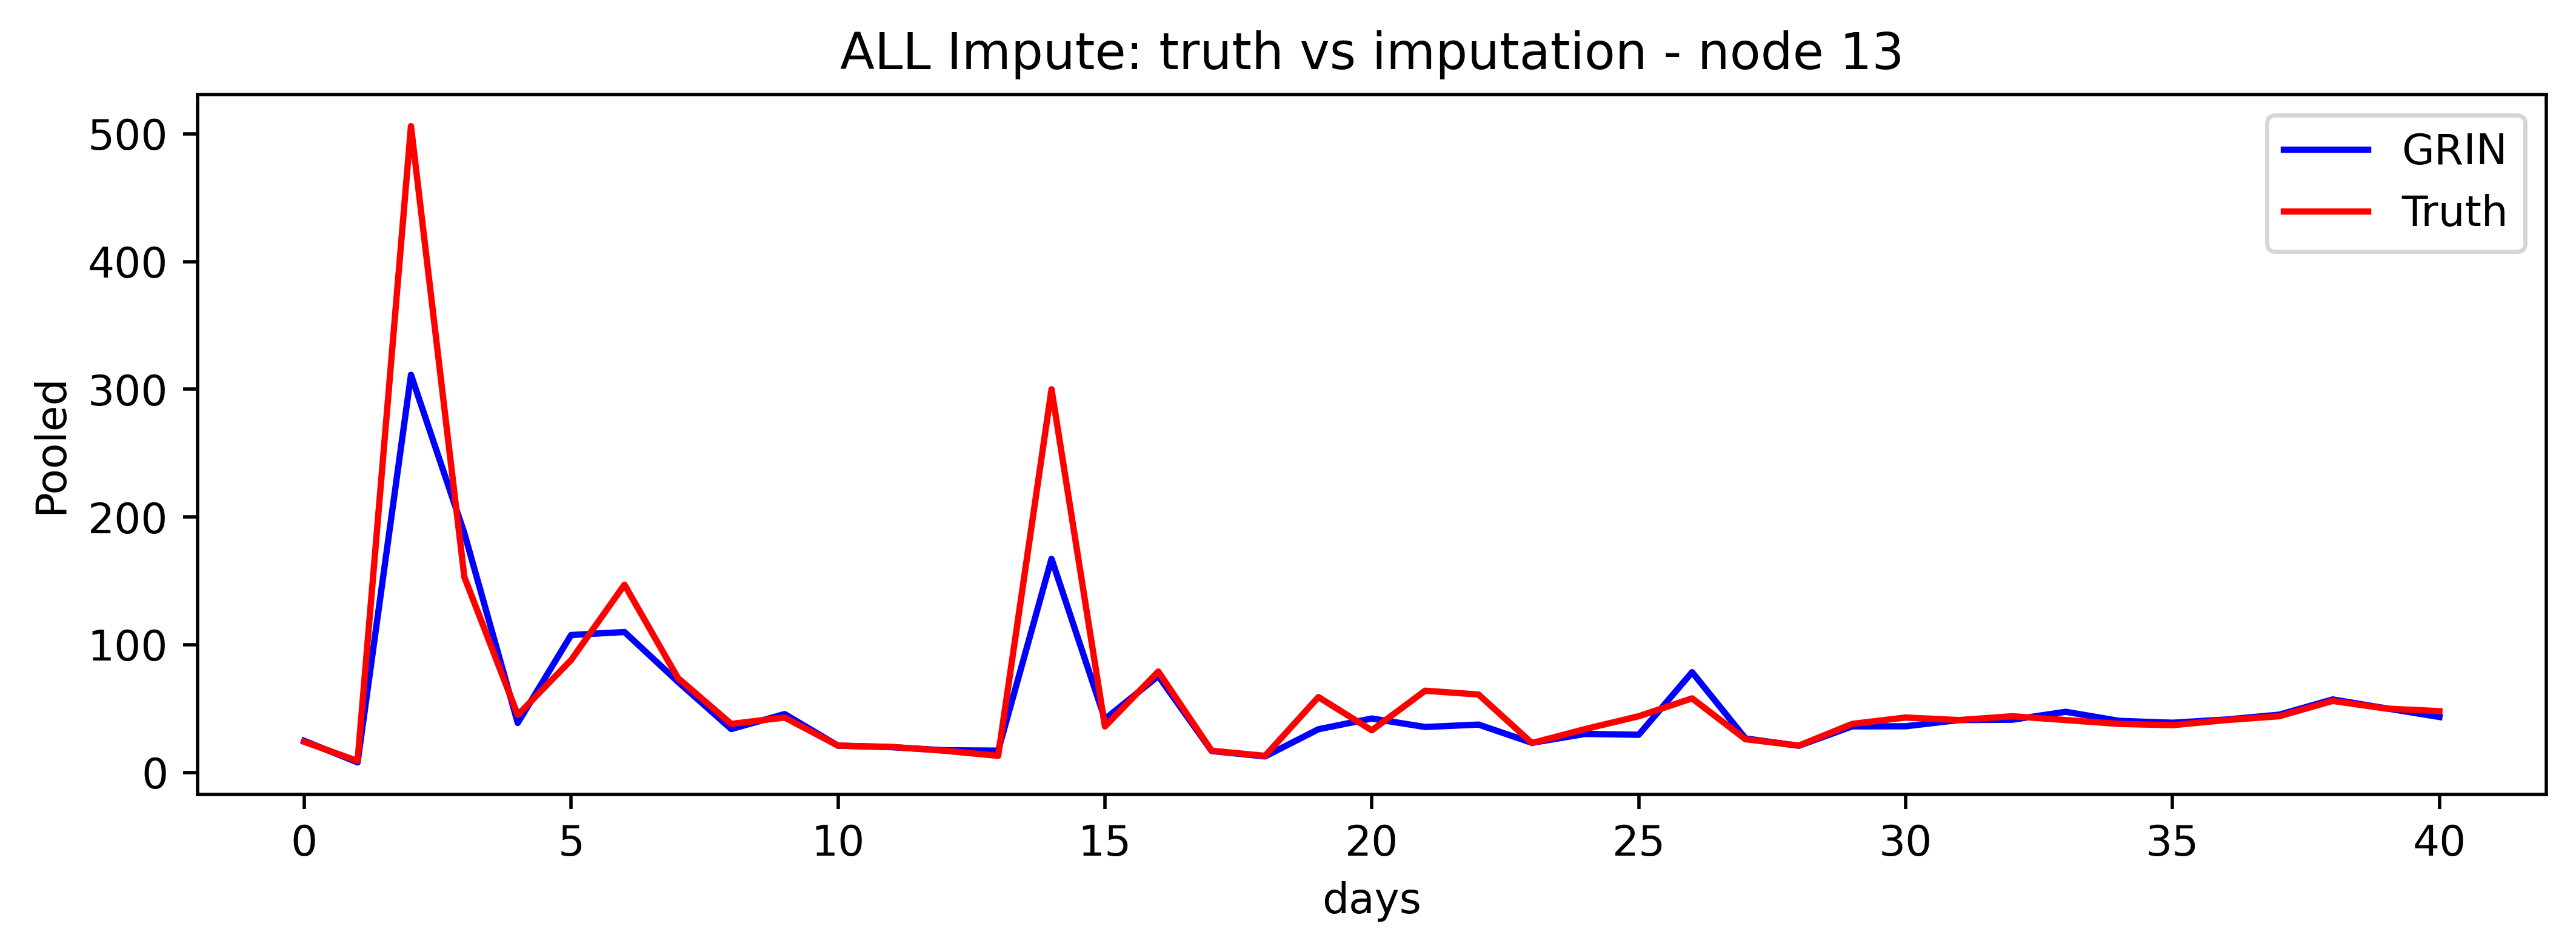

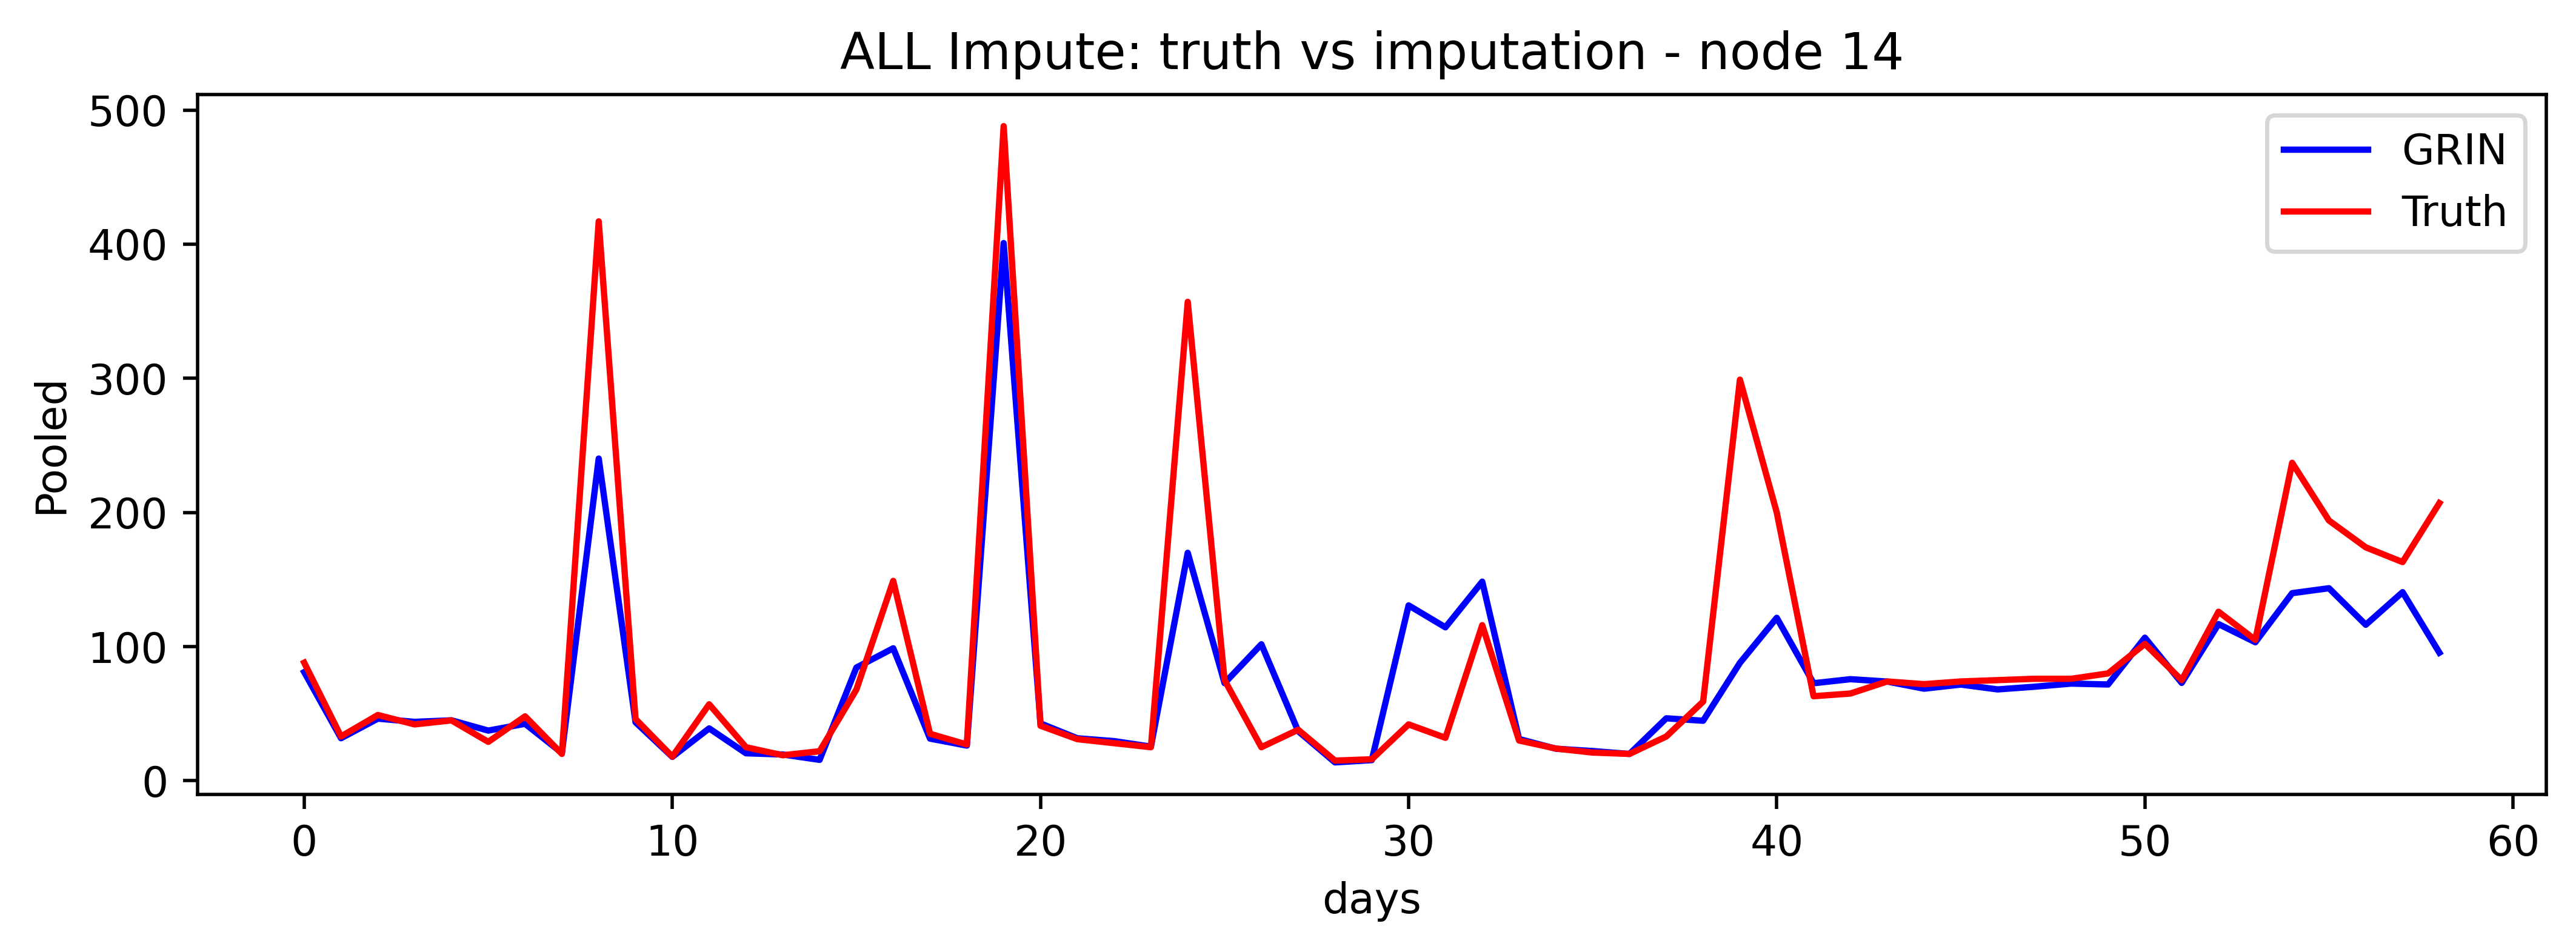

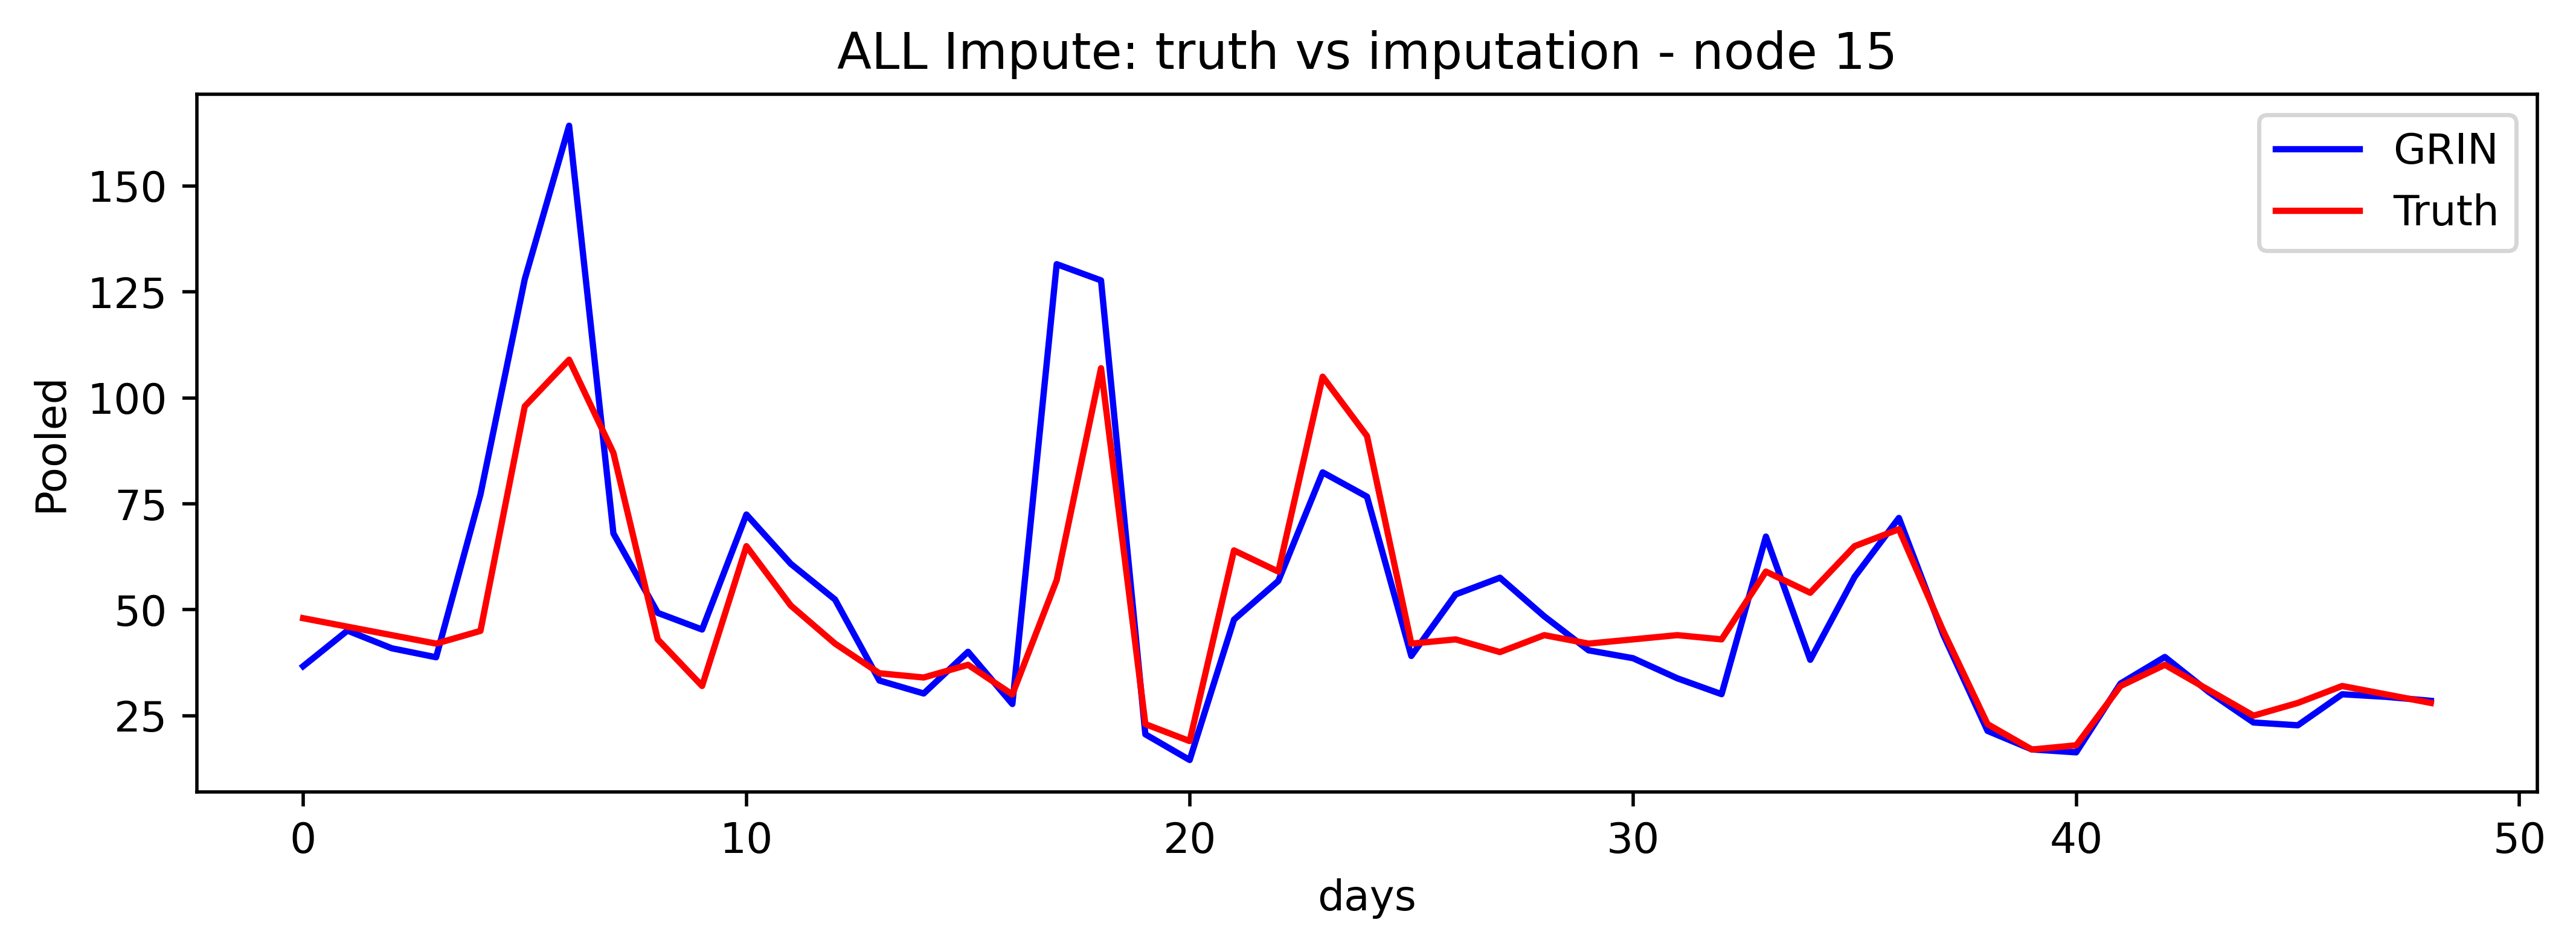

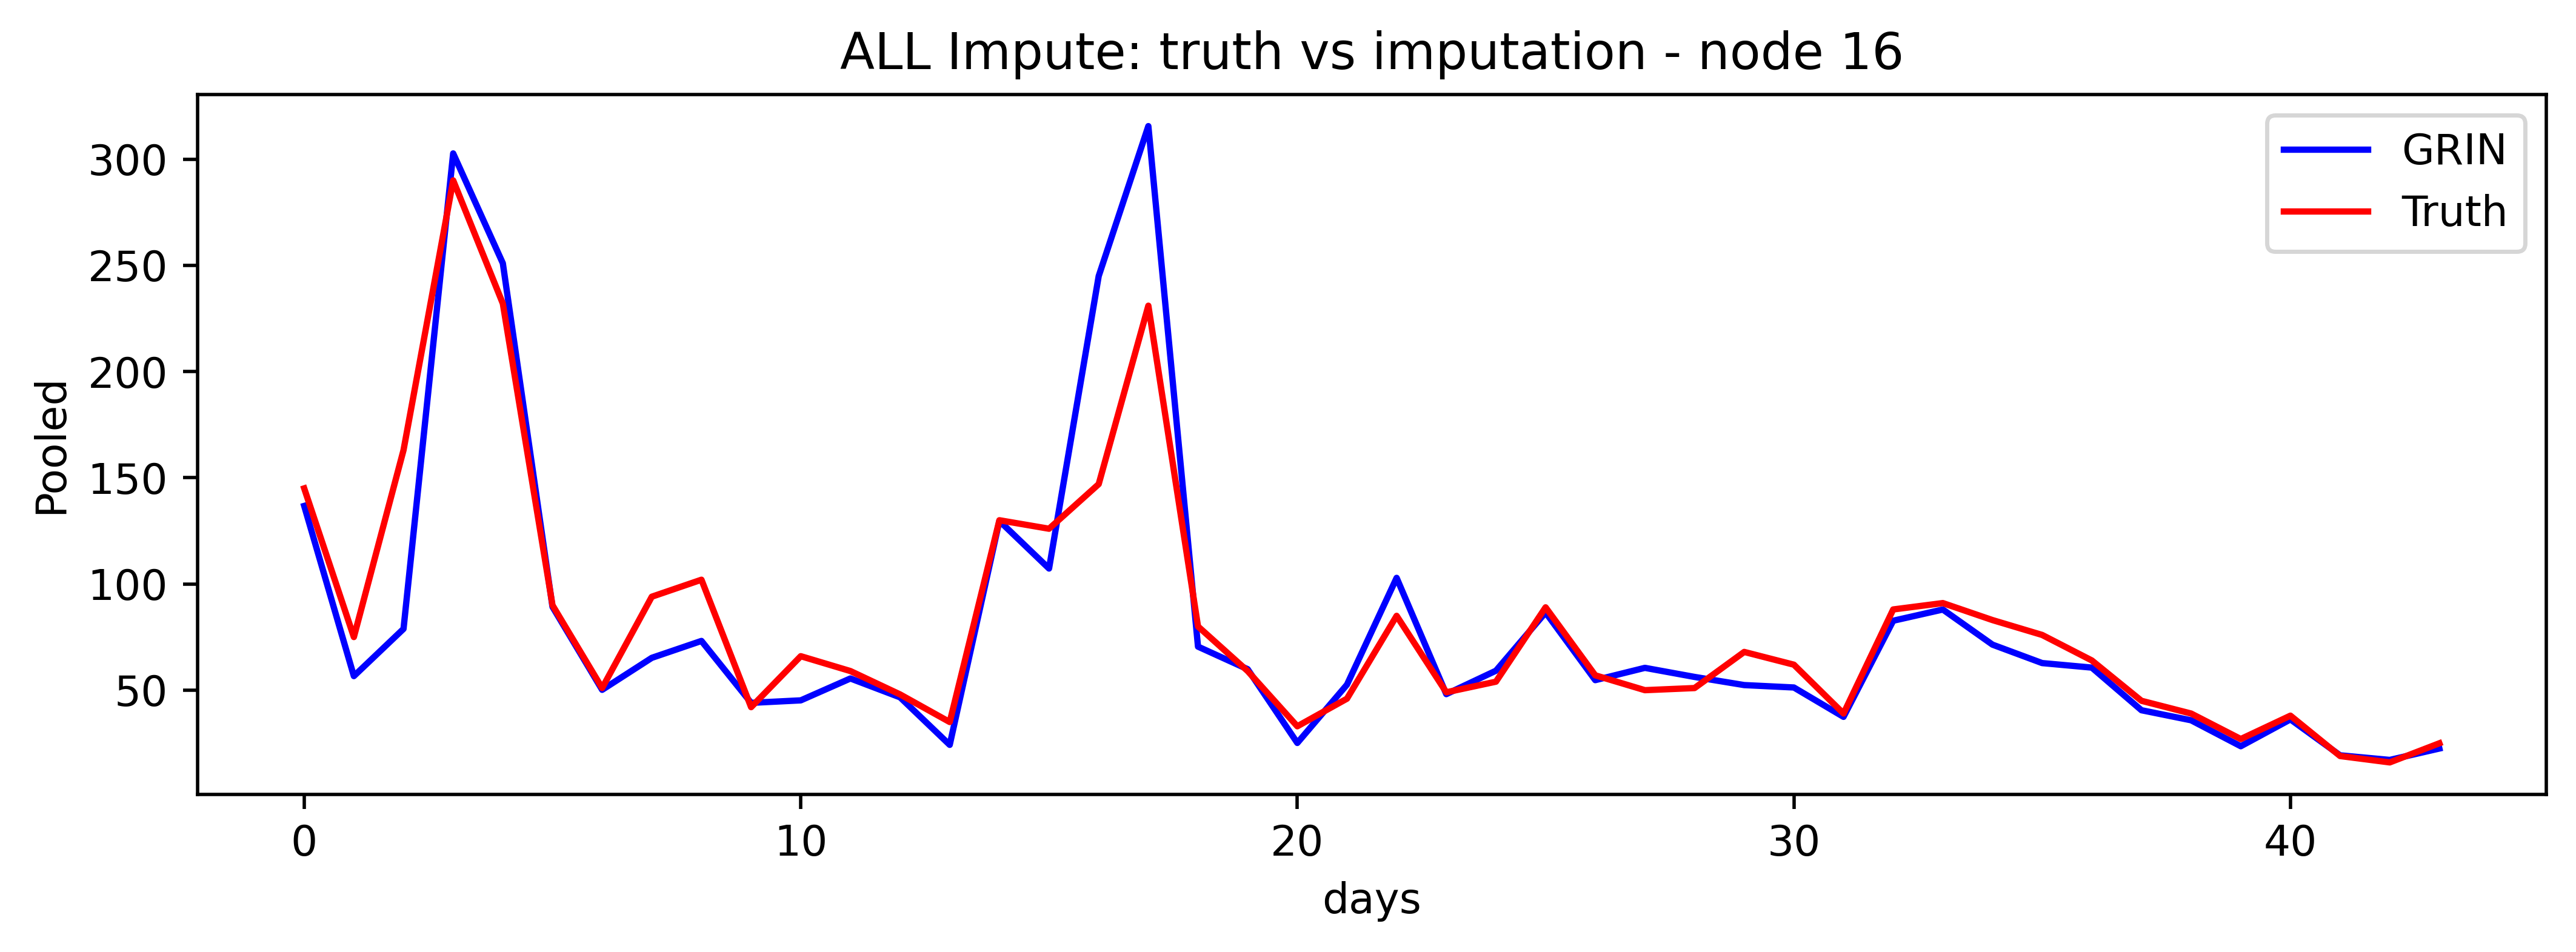

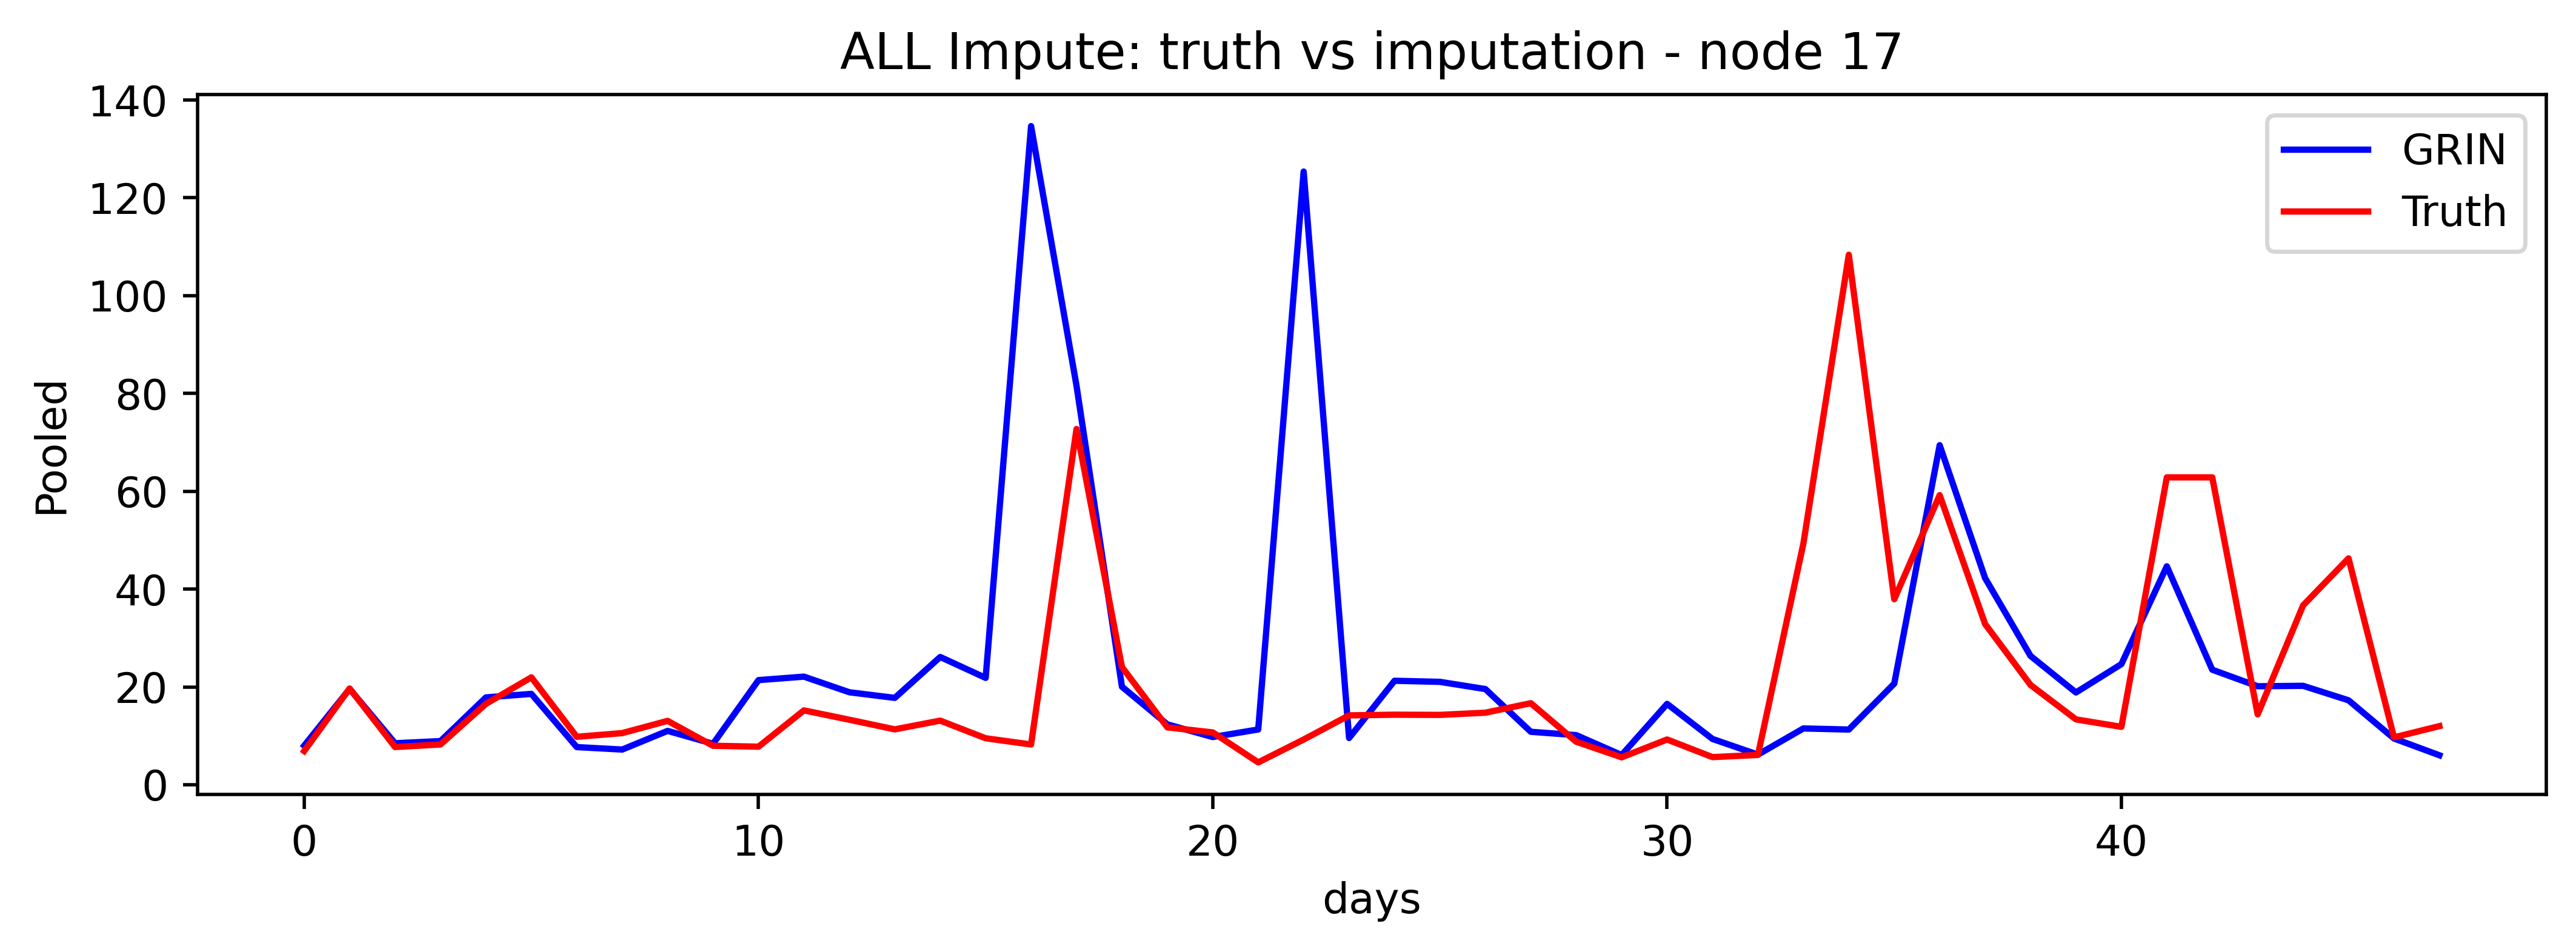

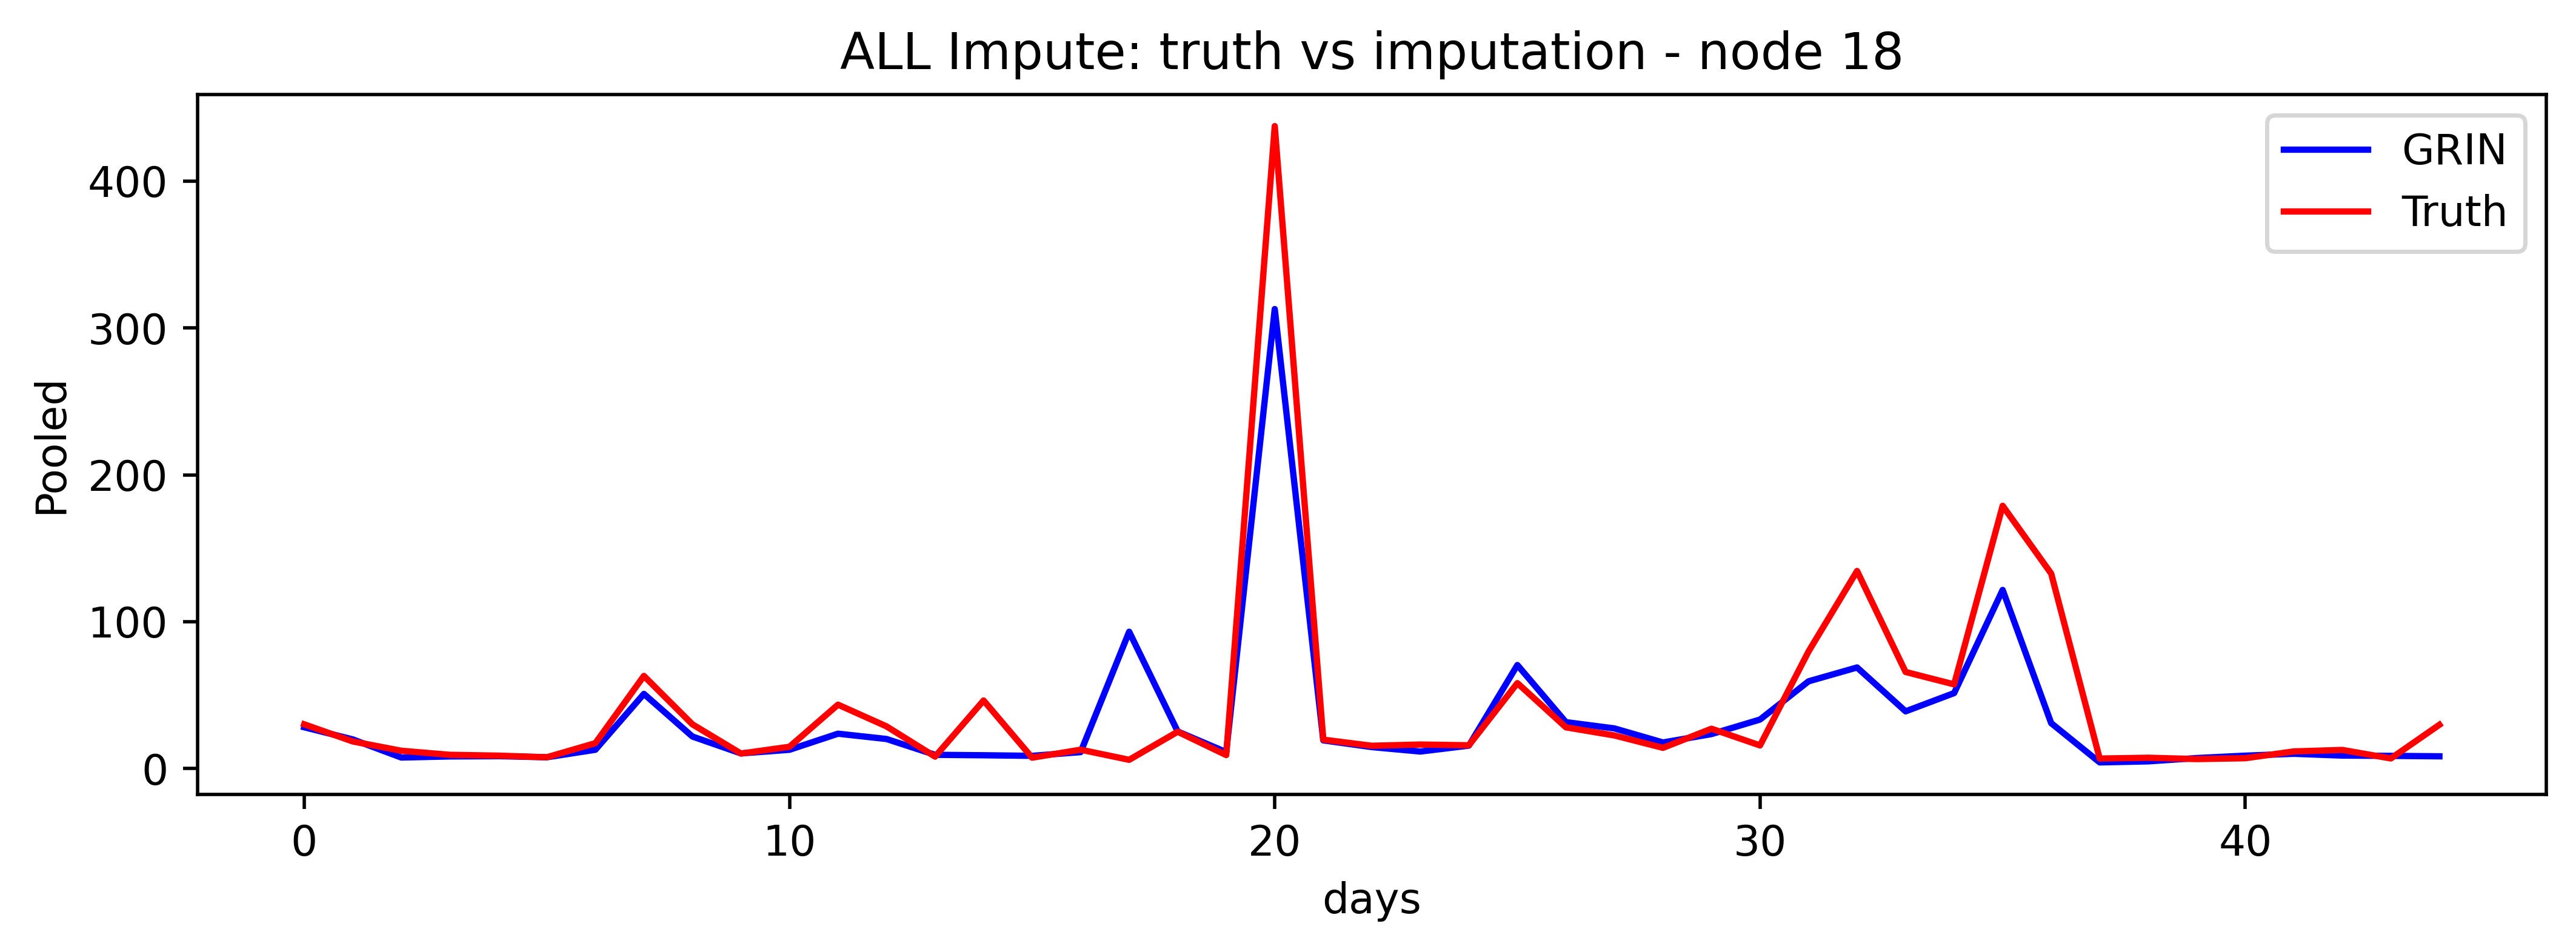

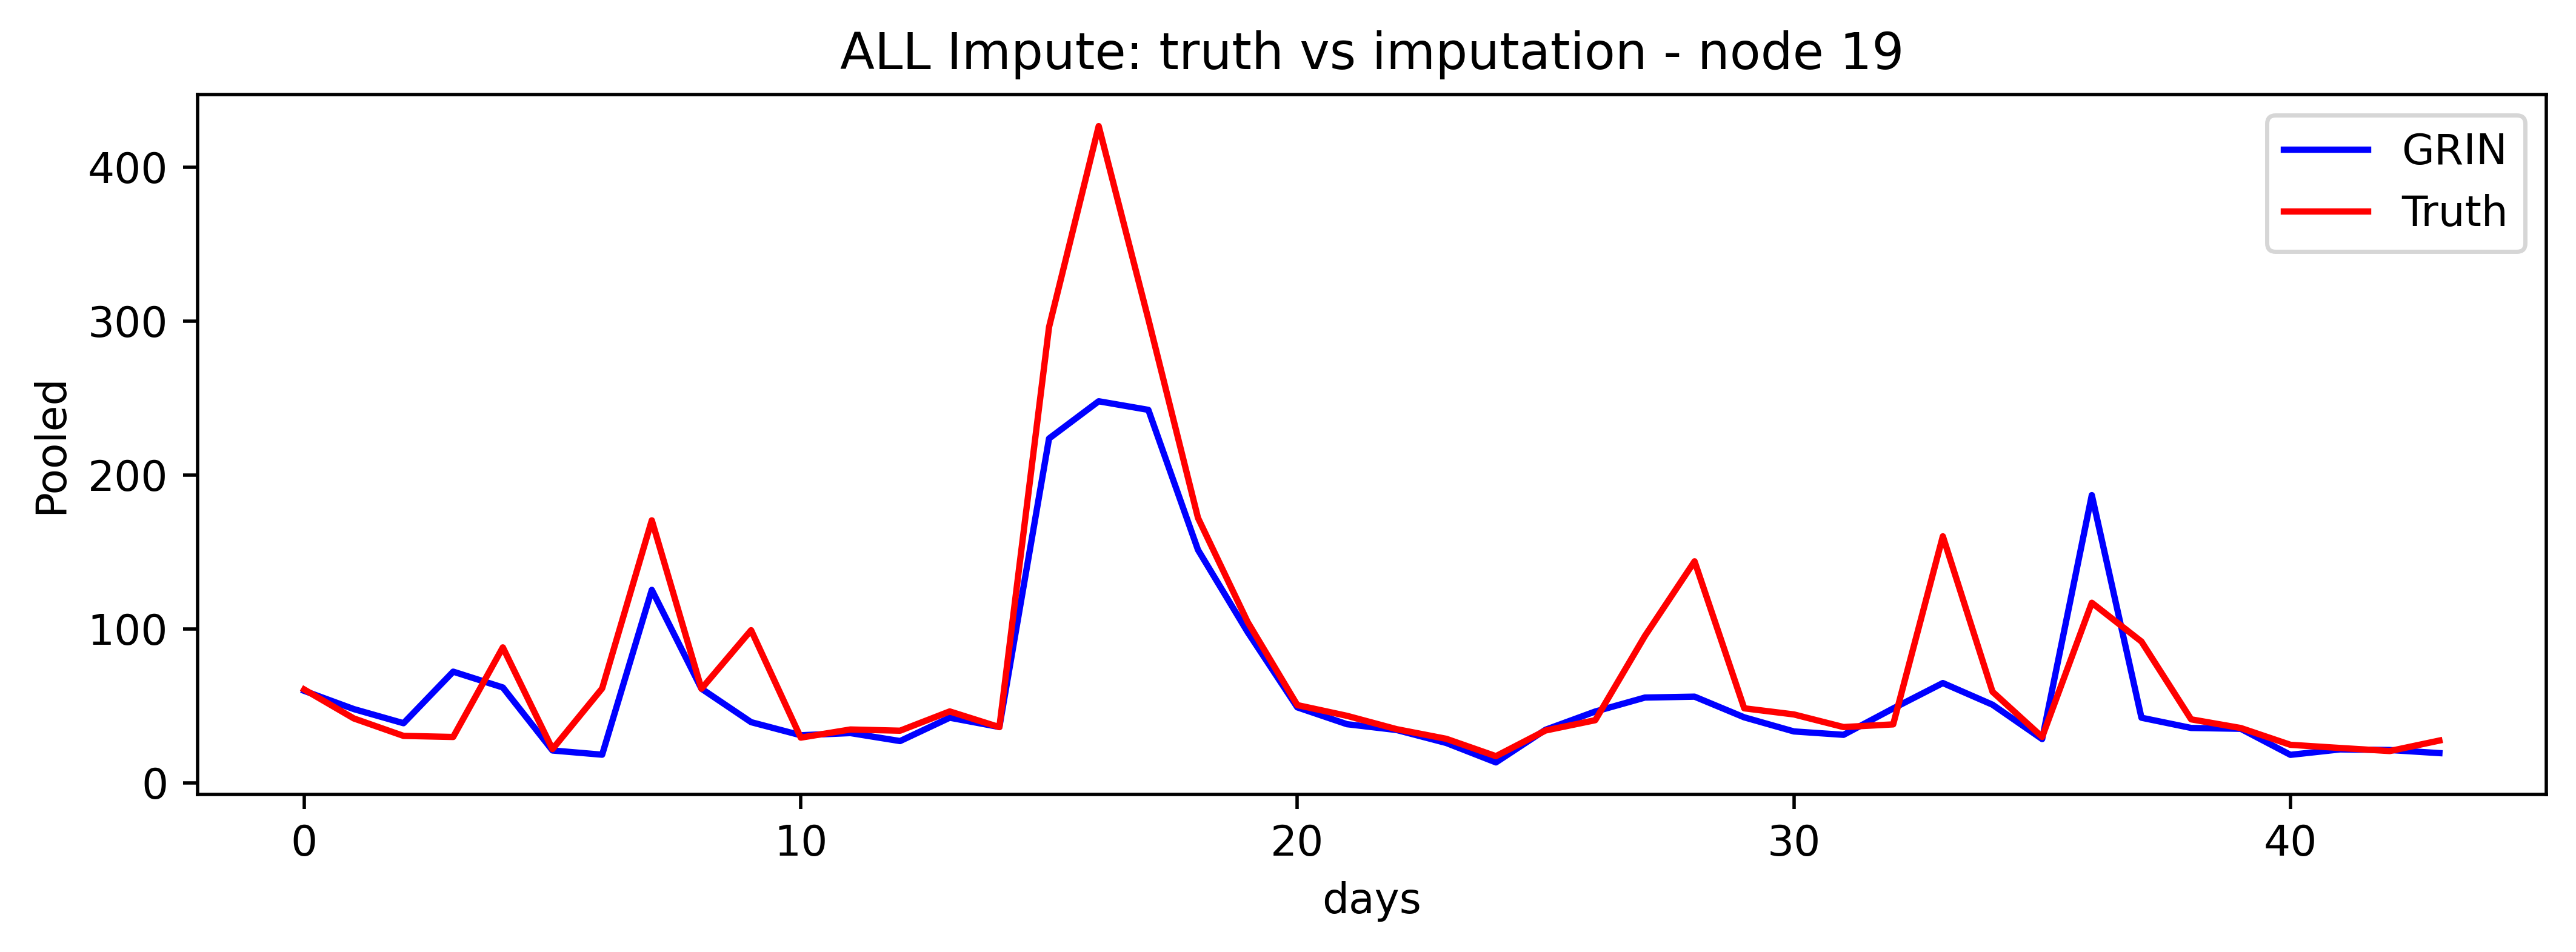

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

mask = pd.read_csv('grin_mask.csv',header=None).values

#data_full = pd.read_csv('true.csv',index_col=0)
pre_data = pd.read_csv('grin_pre.csv',header=None,index_col=0).values
#var_pre =  pd.read_csv('var_pre.csv',header=None,index_col=0).values
#gru_pre = pd.read_csv('mpgru_pre.csv',header=None,index_col=0).values
#rgain_pre = pd.read_csv('gain_pre.csv',header=None,index_col=0).values
#brits_pre = pd.read_csv('brits_pre.csv',header=None,index_col=0).values
true_data = pd.read_csv('true.csv',header=None,index_col=0).values
#plt.hist(data_full.values,bins=100)
#plt.xlim(0,2500)
#print(2811*20, len(np.where(data_full.values>3000)[0]))
#print(mask.shape,pre_data.shape,true_data.shape)

mae = np.absolute(pre_data-true_data) * mask
mse = (pre_data-true_data) * (pre_data-true_data) * mask 
mre = mae.sum()  / ((true_data*mask).sum())
#print(mre)
#mask_n = len(np.where(mask==1)[0])

#mask_node = np.sum(mask,axis=0)

#mask_big = np.where(true_data*mask>1000)
#print(len(mask_big[0])/mask_n)
#mse_big = mse[mask_big]
#mre_big = mae[mask_big].sum()/((true_data[mask_big].sum()))
data_pre = pre_data * mask + true_data * (1-mask)
#var_p = var_pre * mask + true_data * (1-mask)
#mpgru_p = gru_pre * mask + true_data * (1-mask)
#rgain_p = rgain_pre * mask + true_data * (1-mask)
#brits_p = brits_pre * mask + true_data * (1-mask)
for i in range(20):
    plt.figure(figsize=(10,3),dpi=500)
    #plt.plot(var_p[np.where(mask[:,i]==1),i].reshape(data_pre[np.where(mask[:,i]==1),i].shape[1],-1),label='var',color = 'g')
    #plt.plot(mpgru_p[np.where(mask[:,i]==1),i].reshape(data_pre[np.where(mask[:,i]==1),i].shape[1],-1),label='Mpgru',color = 'y')
    #plt.plot(rgain_p[np.where(mask[:,i]==1),i].reshape(data_pre[np.where(mask[:,i]==1),i].shape[1],-1),label='rgain')
    #plt.plot(brits_p[np.where(mask[:,i]==1),i].reshape(data_pre[np.where(mask[:,i]==1),i].shape[1],-1),label='Brits')
    plt.plot(data_pre[np.where(mask[:,i]==1),i].reshape(data_pre[np.where(mask[:,i]==1),i].shape[1],-1),label='GRIN',color = 'b')
    plt.plot(true_data[np.where(mask[:,i]==1),i].reshape(true_data[np.where(mask[:,i]==1),i].shape[1],-1),label='Truth',color='r')
    plt.legend()
    plt.xlabel('days')
    plt.ylabel('Pooled')
    #plt.yscale('log')
    plt.title('ALL Impute: truth vs imputation - node %d'%i)

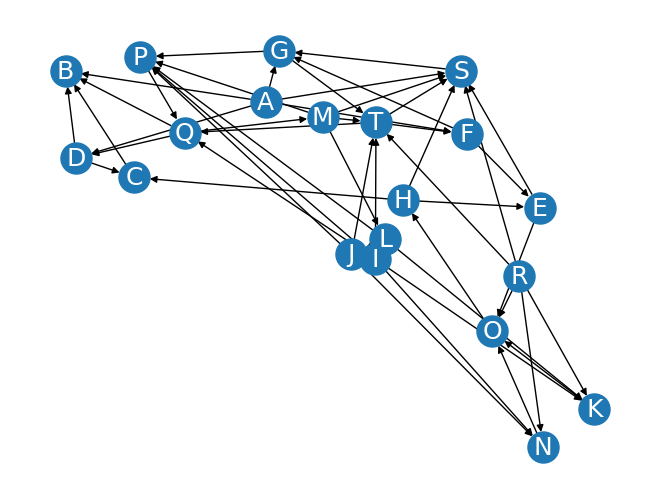

In [9]:
import os
os.environ['CASTLE_BACKEND'] = 'pytorch'

from collections import OrderedDict

import numpy as np
import networkx as nx
import pandas as pd 

import castle
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import IIDSimulation, DAG
from castle.algorithms import PC, GES, ICALiNGAM, GOLEM

import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\Users\89457\Desktop\optimizaiton\Spatial-Temporal\spatial-temporal\grin-main\datasets/discharge\SSC_discharge.csv',index_col=0).values
pc = PC()
pc.learn(data)
learned_graph = nx.DiGraph(pc.causal_matrix)
MAPPING = {k:v for k,v in zip(range(20),[chr(i) for i in range(65,85)])}
learned_graph = nx.relabel_nodes(learned_graph, MAPPING, copy=True)
nx.draw(
    learned_graph, 
    with_labels=True,
    node_size=500,
    font_size=18,
    font_color='white'
)


Method:PC


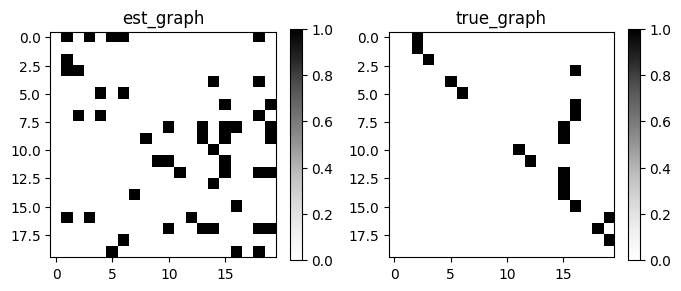

FDR: 0.8776
Recall: 0.3158
Precision: 0.1224
F1 score: 0.1765
Method:GES


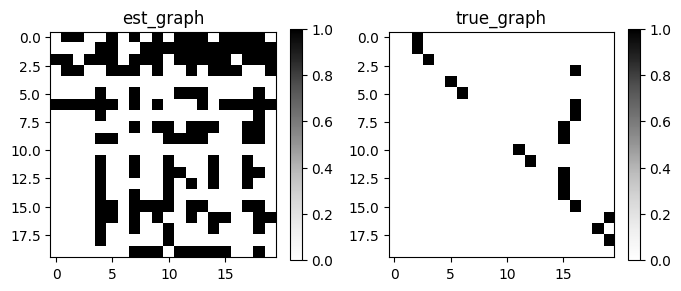

FDR: 0.958
Recall: 0.3158
Precision: 0.0411
F1 score: 0.0727
Method:LiNGAM


c:\Users\89457\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


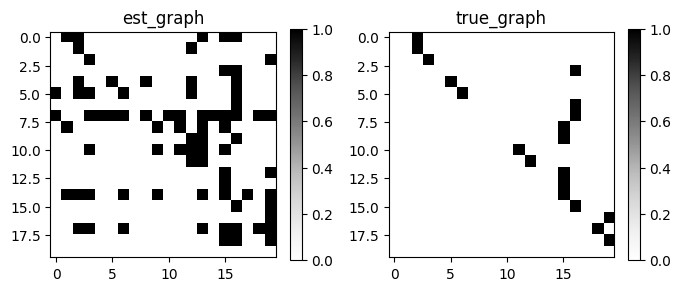

2023-07-03 23:49:16,380 - c:\Users\89457\anaconda3\envs\pytorch-gpu\lib\site-packages\castle\algorithms\gradient\notears\torch\golem.py[line:120] - INFO: GPU is available.
2023-07-03 23:49:16,389 - c:\Users\89457\anaconda3\envs\pytorch-gpu\lib\site-packages\castle\algorithms\gradient\notears\torch\golem.py[line:207] - INFO: Started training for 25000 iterations.
2023-07-03 23:49:16,394 - c:\Users\89457\anaconda3\envs\pytorch-gpu\lib\site-packages\castle\algorithms\gradient\notears\torch\golem.py[line:220] - INFO: [Iter 0] score=275.039, likelihood=275.039, h=0.0e+00


FDR: 0.7722
Recall: 0.9474
Precision: 0.2278
F1 score: 0.3673
Method:GOLEM


2023-07-03 23:56:01,591 - c:\Users\89457\anaconda3\envs\pytorch-gpu\lib\site-packages\castle\algorithms\gradient\notears\torch\golem.py[line:220] - INFO: [Iter 5000] score=229.391, likelihood=227.123, h=1.1e-01
2023-07-04 00:01:27,614 - c:\Users\89457\anaconda3\envs\pytorch-gpu\lib\site-packages\castle\algorithms\gradient\notears\torch\golem.py[line:220] - INFO: [Iter 10000] score=228.374, likelihood=226.030, h=8.8e-02
2023-07-04 00:07:43,240 - c:\Users\89457\anaconda3\envs\pytorch-gpu\lib\site-packages\castle\algorithms\gradient\notears\torch\golem.py[line:220] - INFO: [Iter 15000] score=228.307, likelihood=225.840, h=9.4e-02
2023-07-04 00:14:10,769 - c:\Users\89457\anaconda3\envs\pytorch-gpu\lib\site-packages\castle\algorithms\gradient\notears\torch\golem.py[line:220] - INFO: [Iter 20000] score=228.307, likelihood=225.843, h=9.4e-02
2023-07-04 00:19:58,674 - c:\Users\89457\anaconda3\envs\pytorch-gpu\lib\site-packages\castle\algorithms\gradient\notears\torch\golem.py[line:220] - INFO:

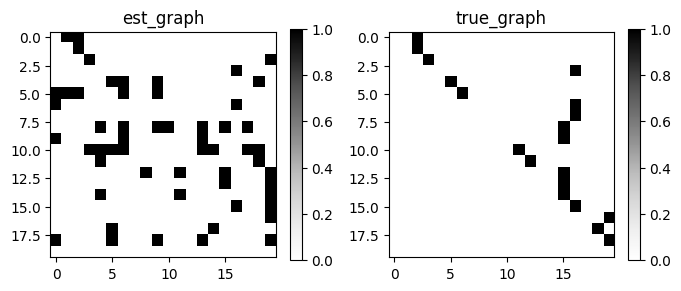

FDR: 0.7679
Recall: 0.6842
Precision: 0.2321
F1 score: 0.3467


In [11]:
methods = OrderedDict({
    'PC': PC,
    'GES': GES,
    'LiNGAM': ICALiNGAM,
    'GOLEM': GOLEM
})
result = {}
true_dag= np.array(pd.read_csv(r'C:\Users\89457\Desktop\optimizaiton\Spatial-Temporal\spatial-temporal\grin-main\datasets/discharge\SSC_sites_flow_direction.csv',index_col=0).values)
for method in methods:
    print(f'Method:{method}')
    if method == 'GOLEM':
        model = methods[method](num_iter=2.5e4)
    else: 
        model = methods[method]()

    model.learn(data)
    pred_dag = model.causal_matrix 
    adj = pd.DataFrame(pred_dag)
    adj.to_csv('%s.csv'%method,header=None)
    GraphDAG(pred_dag,true_dag,'results')
    mt = MetricsDAG(pred_dag, true_dag)
    print(f'FDR: {mt.metrics["fdr"]}')
    print(f'Recall: {mt.metrics["recall"]}')
    print(f'Precision: {mt.metrics["precision"]}')
    print(f'F1 score: {mt.metrics["F1"]}')
    result[method] = pred_dag 


    

In [14]:
import pandas as pd 
import numpy as np 
datt = pd.read_csv('PC.csv',header=None,index_col=0)
print(datt.values.shape)

(20, 20)


(20, 20)


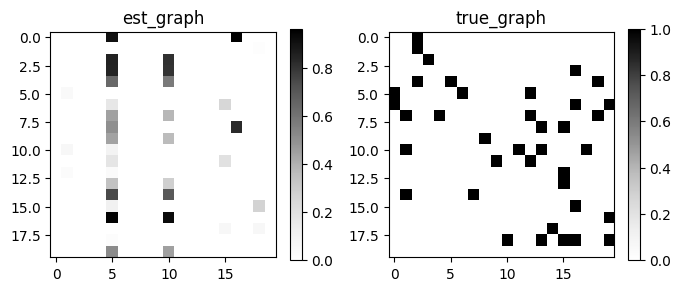

In [10]:
from castle.common import GraphDAG
import pandas as pd 
import numpy as np
cs_dag= np.array(pd.read_csv(r'C:\Users\89457\Desktop\optimizaiton\Spatial-Temporal\spatial-temporal\grin-main\causal.csv',header=None).values)
cs = np.zeros(cs_dag.shape)
print(cs.shape)
cs[np.where(cs_dag>0.3)] = 1


pred_dag = np.array(pd.read_csv(r'C:\Users\89457\Desktop\optimizaiton\Spatial-Temporal\spatial-temporal\grin-main\relation.csv',header=None))
GraphDAG(pred_dag,cs,'results')